# Graf over referanser

Lars G Johnsen, Kirsten Sivesind, Dijana Tiplic


Vi skal se på clustring basert på de bibliografiske dataene

In [2]:
import conc_coll_corpus as co
from conc_coll_corpus import zotero
import pandas as pd
import dhlab.nbtext as nb
import imp
import dhlab.module_update as mu

/tmp/ipykernel_7936/1626599664.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [46]:
import ipydagred3 as dg
import networkx as nx


def make_dagred3_from_graph(graph):
    
    g = dg.Graph()
    for e in graph.edges():
        g.setEdge(e[0],     e[1],     label="")
                
    return g

In [4]:
mu.css()

In [5]:
pd.set_option('display.max_colwidth',1000)

Mesteparten av koden ligger i modulen kalt _co_ i importlisten. Den modulen henter inn metadataen også, som blir referert til med variabelen _co.zotero_.

In [6]:
co.zotero.head()

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,Departement,Utdanning,Reform,...,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body,Type
0,NHG4G4L4,book,1990,Sosialdepartementet,NOU 1990: 17 Uførepensjon,NaN,978-82-583-0212-1,Sosial,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOU
1,CDEE3MMB,book,1991,Arbeids- og administrasjonsdepartementet,NOU 1991: 26 Om bruk av styrer i statlige virksomheter,NaN,978-82-583-0238-1,Administrasjon,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOU
2,VK7MYWPG,document,1992,Arbeids- og administrasjonsdepartementet,St.meld. nr. 35 (1991-92) Om statens forvaltnings- og personalpolitikk. Fundament for fellesskap,NaN,NaN,Administrasjon,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STM
3,ICIN6V7I,book,1990,Arbeids- og Administrasjonsdepartementet,NOU 1990: 32 Statens lønnskomité av 1988,NaN,978-82-583-0179-7,Administrasjon,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOU
4,GJ4QZKTS,book,1991,Arbeids- og administrasjonsdepartementet,NOU 1991: 8 Lov om statsforetak:en utredning fra et utvalg oppnevnt ved kongelig resolusjon 24. august 1990 ; avgitt til Arbeids- og administrasjonsdepartementet februar 1991,NaN,978-82-583-0192-6,Administrasjon,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOU


Bibliografien ligger i __Notes__, så vi henter ut dem.

In [7]:
#corpus_name = "sub_corpus/POLNET_tom2016_load0250321.xlsx"
corpus_name = "POLNET_from1988_load091220c.xlsx"

In [8]:
subcorpus = pd.read_excel(corpus_name)

In [9]:
subcorpus

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,Departement,Utdanning,Reform,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,NHG4G4L4,book,1990,Sosialdepartementet,NOU 1990: 17 Uførepensjon,NaN,978-82-583-0212-1,Sosial,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CDEE3MMB,book,1991,Arbeids- og administrasjonsdepartementet,NOU 1991: 26 Om bruk av styrer i statlige virksomheter,NaN,978-82-583-0238-1,Administrasjon,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VK7MYWPG,document,1992,Arbeids- og administrasjonsdepartementet,St.meld. nr. 35 (1991-92) Om statens forvaltnings- og personalpolitikk. Fundament for fellesskap,NaN,NaN,Administrasjon,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ICIN6V7I,book,1990,Arbeids- og Administrasjonsdepartementet,NOU 1990: 32 Statens lønnskomité av 1988,NaN,978-82-583-0179-7,Administrasjon,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GJ4QZKTS,book,1991,Arbeids- og administrasjonsdepartementet,NOU 1991: 8 Lov om statsforetak:en utredning fra et utvalg oppnevnt ved kongelig resolusjon 24. august 1990 ; avgitt til Arbeids- og administrasjonsdepartementet februar 1991,NaN,978-82-583-0192-6,Administrasjon,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,KP783F6E,webpage,2009,Utenriksdepartementet,"St.meld. nr. 13 (2008-2009) Klima, konflikt og kapital - Norsk utviklingspolitikk i et endret handlingsrom",Regjeringen.no,NaN,Utenriks,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,JCDCZUHK,webpage,2011,Utenriksdepartementet,St.meld. nr. 20 (2010–2011) Norges deltakelse i Europarådet i 2010,Regjeringen.no,NaN,Utenriks,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,4AR6Z52H,webpage,1999,Utenriksdepartementet,St.meld. nr. 21 (1999-2000) Menneskeverd i sentrum Handlingsplan for menneskerettigheter,032005-044002,NaN,Utenriks,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,6NHHZCBM,webpage,2011,Utenriksdepartementet,St.meld. nr. 7 (2011–2012) Nordområdene Visjon og virkemidler,Regjeringen.no,NaN,Utenriks,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
referanser = list(subcorpus[['Key','Notes']].to_records())

Data ligger nå som et sett tupler `(index, Key, Bibliografisk beskrivelse)`.

In [11]:
referanser[:5]

[(0, 'NHG4G4L4', '<p>2KXZIYTT</p>; statement of responsibility: fra en arbeidsgruppe oppnevnt av Sosialdepartementet av 17. november 1988 ; avgitt juli 1990. Leder: Odd Helge Askevold. Også særskilt vedlegg til St.meld. nr 39 (1991-92). reproduction: Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-09-29; statement of responsibility: fra en arbeidsgruppe oppnevnt av Sosialdepartementet av 17. november 1988 ; avgitt juli 1990. Leder: Odd Helge Askevold. Også særskilt vedlegg til St.meld. nr 39 (1991-92). reproduction: Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-09-29'),
 (1, 'CDEE3MMB', '<p>EG5CF9XD</p>; Leder: Halvor Stenstadvold. Også særskilt vedlegg til St.meld. nr 35 (1991-92). reproduction: Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2009-09-21'),
 (2, 'VK7MYWPG', '<p>7CIQ9LTV</p>; <p>EAMLK3Y5</p>; <p>JQNL2KII</p>; <p>U68LQ887</p>'),
 (3, 'ICIN6V7I', '<p>3SN7EBSL</p>; statement of responsibility: fra et utvalg oppnevnt ved ko

 I tredje posisjon ligger dataene mellom `<p>`-elementer, og vi peller ut listen av nøkler i hver. For det formålet benyttes regulære uttrykk. Moduler for nettverk og regulærer uttrykk importeres.

In [12]:
import re
import networkx as nx

Henter ut referansene og lager en graf som en liste av buer. Selve konstruksjonen kan tas skritt for skritt ved en anledning.

In [13]:
reference_dict = {
    referanser[i][1]:re.findall("<p>([0-9A-Z]+)</p>", referanser[i][2]) 
    for i in range(len(referanser)) 
    if  type(referanser[i][2]) is str
}
edge_list = [(x, y) for x in reference_dict for y in reference_dict[x] ]

Slik ser buene ut som en liste av par av nøkler, elementer i `Key`. Første element har andre element i sin bibliografi. Selv om det er en rettet graf, med en klar rettethetssemantikk - første element referer til andre element - skal vi behandle grafen som urettet graf. Clustringsalgoritmene forutsetter det.

In [14]:
edge_list[:5]

[('NHG4G4L4', '2KXZIYTT'),
 ('CDEE3MMB', 'EG5CF9XD'),
 ('VK7MYWPG', '7CIQ9LTV'),
 ('VK7MYWPG', 'EAMLK3Y5'),
 ('VK7MYWPG', 'JQNL2KII')]

# Trim edgelist

In [15]:
trimmed_edge_list = [x for x in edge_list if x[1] in subcorpus.Key.values]
trimmed_edge_list[:2]

[('NHG4G4L4', '2KXZIYTT'), ('CDEE3MMB', 'EG5CF9XD')]

In [16]:
len([x for x in edge_list if not x in trimmed_edge_list])

51

In [17]:
len(trimmed_edge_list)

1454

Grafen bygges fra buelisten konstruert over.

In [18]:
G = nx.from_edgelist(trimmed_edge_list)

I visningen av clustre skal vi bruke tittelen som navn på noden. Navnet hentes fra det som ligger i kolonne _Title_. Her kan vi lage kombinasjoner og andre ting. 

In [19]:
labels = {x:co.zotero[co.zotero.Key == x]['Title'].to_string() for x in G.nodes()}

Oversettelsen fra nøkler (Key) til tittel er ikke helt perfekt, men vi kan se mer på det.

In [20]:
ldict = dict(list(labels.items()))

In [21]:
ldict['YRG6ESN4']

'327    St.meld. nr. 42 (1993-94) Kringkasting og dagspresse 1993 m.v.'

For visning benytter vi kode fra dhlab-modulen.

In [22]:
import dhlab.graph_networkx_louvain as gnl

In [23]:
import networkx as nx
import seaborn as sns
def draw_graph_centrality2(G, Subsets=[],  h=15, v=10, deltax=0, deltay=0, fontsize=18, k=0.2, arrows=False, 
                           node_alpha=0.3, l_alpha=1, node_color='blue', centrality=nx.degree_centrality, 
                           font_color='black', 
                           threshold=0.01, 
                           multi=3000,
                          edge_color='olive',
                           edge_alpha = 0.1,
                          colstart=0.2,
                          coldark=0.5):
    
    from pylab import rcParams
    import matplotlib.pyplot as plt
    from matplotlib import colors as mcolors


    colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
    node_dict = centrality(G)
    subnodes = dict({x:node_dict[x] for x in node_dict if node_dict[x] >= threshold})
    #print(subnodes)
    x, y = rcParams['figure.figsize']
    rcParams['figure.figsize'] = h, v
    
    ax = plt.subplot()
    ax.set_xticks([])
    ax.set_yticks([])
    #G = G.subgraph(subnodes)
    glob_col = sns.hls_palette(len(G), h=colstart, l=coldark)[0]
    pos = nx.spring_layout(G, k=k)
    labelpos = dict({k:(pos[k][0]+ deltax, pos[k][1] + deltay) for k in pos })
    #print(labelpos)
    #print(pos)
    if l_alpha <= 1 and fontsize > 0:
        nx.draw_networkx_labels(G, labelpos, font_size=fontsize, alpha = l_alpha, font_color = font_color)
    sub_color = 0
    if Subsets != []:
        i = 0
        colpalette = sns.hls_palette(len(Subsets), h=colstart, l=coldark)
        #print(colpalette)
        for Sub in Subsets:
            sublist = dict({x:subnodes[x] for x in subnodes if x in Sub})
            #print(sublist)
            #sub_col = list(colors.values())[np.random.randint(20,100)]
            sub_col= colpalette[i]
            #print(colpalette[i], Sub)
            #print(i, sub_col, sublist.keys())
            #print(i, sub_col)
            nx.draw_networkx_nodes(G, pos, alpha=node_alpha, node_color = [sub_col], nodelist= [x for x in sublist.keys()], node_size = [v * multi for v in sublist.values()])
            i += 1
    else:
        nx.draw_networkx_nodes(G, pos, alpha=node_alpha, node_color= glob_col,  nodelist = subnodes.keys(), node_size = [v * multi for v in subnodes.values()])
        True
        
    nx.draw_networkx_edges(G, pos, alpha= edge_alpha, arrows = arrows, edge_color = edge_color)

    rcParams['figure.figsize'] = x, y
    return

In [39]:
Gd = nx.from_edgelist([x for x in G.edges() if x[0] != x[1]])

In [42]:
Gd = Gd.to_directed()

In [47]:
dG = make_dagred3_from_graph(Gd)

In [48]:
Gd.is_directed()

True

In [49]:
widget = dg.DagreD3Widget(graph=dG)
widget

DagreD3Widget()

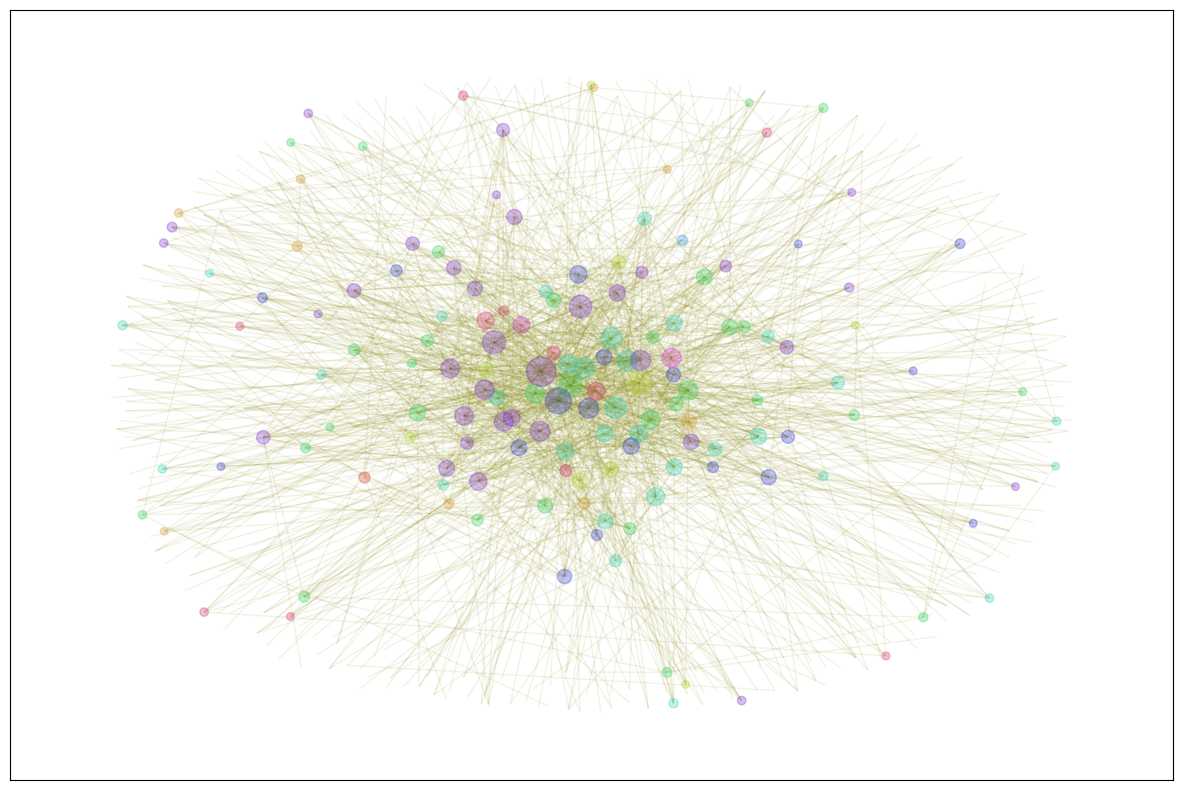

In [33]:
draw_graph_centrality2(G, gnl.mcommunity(G),k = 0.8, fontsize= 0)

De mest sentrale dokumentene basert på _betweenness_

In [27]:
sentral_dok = nb.central_betweenness_characters(G, 10)
mu.printmd('\n\n'.join(["`" + str(round(x[1], 4)) + '`  ' + labels[x[0]] for x in sentral_dok]))
mu.printmd("\n\n--------\n\n")

`0.1419`  357    NOU 2019: 23 Ny opplæringslov

`0.084`  194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil"

`0.0796`  353    NOU 2018: 15 Kvalifisert, forberedt og motivert Et kunnskapsgrunnlag om struktur og innhold i videregående opplæring

`0.0778`  340    NOU 2009: 18 Rett til læring

`0.0777`  203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge

`0.071`  311    NOU 1988: 28 Med viten og vilje

`0.061`  298    NOU 1985: 14 Samisk kultur og utdanning

`0.0588`  361    NOU 2020: 3 Ny lov om universiteter og høyskoler

`0.0517`  227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning

`0.0517`  339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning



--------



In [28]:
sentral_dok = nb.central_characters(G, 10)
mu.printmd('\n\n'.join(["`" + str(round(x[1], 4)) + '`  ' + labels[x[0]] for x in sentral_dok]))
mu.printmd("\n\n--------\n\n")

`0.1497`  357    NOU 2019: 23 Ny opplæringslov

`0.1164`  353    NOU 2018: 15 Kvalifisert, forberedt og motivert Et kunnskapsgrunnlag om struktur og innhold i videregående opplæring

`0.0956`  203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge

`0.0956`  194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil"

`0.0936`  340    NOU 2009: 18 Rett til læring

`0.0894`  341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet

`0.0811`  174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen

`0.079`  476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle

`0.0728`  227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning

`0.0728`  311    NOU 1988: 28 Med viten og vilje



--------



Og her basert på ren sentralitet, de dokumentene som er knyttet til flest andre. Skal samsvare med referansehyppighet. Listen er ganske lik den over.

### Clustring

Selve clustringen ligger i kommandoen `gnl.community_dict`. Nodene, som er nøkler, erstattes av korresponderende tittel. Hvert cluster er ordnet etter sentralitet, det meste sentrale først.

In [29]:
cg = gnl.community_dict(G)
translate = {x:[labels[z] for z in cg[x]] for x in cg}

Overskrift = "## Det er {n}  clustre basert på {d} dokumenter\n\n".format(n = len(cg), d = len(G.nodes()))
rows = '\n\n'.join(["__Cluster "+ str(i + 1) + "__\n\n* " + '\n\n* '.join(translate[x]) for i,x in enumerate(translate)])
mu.printmd(Overskrift + rows)

## Det er 11  clustre basert på 482 dokumenter

__Cluster 1__

* 194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil"

* 336    NOU 2007: 11 Studieforbund - læring for livet

* 495    St.meld. nr. 54 (1989-90) Om opplæring av barn, unge og voksne med særskilte behov.

* 394    St.meld. nr. 23 (1997—98) Om opplæring for barn, unge og vaksne med særskilde behov Den spesialpedagogiske tiltakskjeda og det statlege støttesystemet

* 223    St.meld. nr. 35 (1990—91) Tillegg til St.meld. nr. 54 (1989—90) Om opplæring av barn, unge og voksne med særskilte behov

* 215    St.meld. nr. 20 (2000-2001) Om korte yrkesrettede utdanninger etter videregående opplæring

* 276    St.meld. nr. 12 (2006-2007) Regionale fortrinn – regional framtid

* 197    NOU 1997: 16 Tilskuddssystemet for private skoler

* 401    St.meld. nr. 61 (1984-85) Om visse sider ved spesialundervisninga og den pedagogisk-psykologiske tenesta

* 480    St.meld. nr. 14 (2003-2004) Om opplæringstilbod for hørselshemma

* 230    St.meld. nr. 45 (1997-98) Om visse endringar i tilskotsordninga for skolar som får statstilskot etter lov om tilskot til private grunnskular og private skular som gjev vidaregåande opplæring

* 11    NOU 1992: 32 Bedre struktur i lovverket: Lovstrukturutvalgets delutredning II

* 206    NOU 2000: 5 Mellom barken og veden - om fagskoleutdanninger

* 463    St.meld. nr. 47 (1989-90) Om gjennomføringen av reformer for mennesker med psykisk utviklingshemming

* 406    NOU 1972: 41 Vaksenopplæring for alle: tilråding frå lovkomitéen om vaksenopplæring. Komitéen oppnemd med Kronprinsregentens resolusjon den 6. mai 1970. Tilråding inngjeven november 1972

* 56    NOU 1994: 15 Kostnadene ved arbeidstidsavtalen og Reform ’94

* 163    St.meld. nr. 98 (1976-1977) Om spesialundervisning

* 465    St.meld. nr. 88 (1966-67) Om utviklingen av omsorgen for funksjonshemmede

* 156    St.meld. nr. 50 (1980-1981) Om statens skoler for spesialundervisning

* 286    NOU 1992: 20 Det gode arbeidsmiljø er lønnsomt for alle

* 469    NOU 1989: 17 Tjenestetilbud til autister

* 29    St.meld. nr. 53 (1992-93) Om seksuelle overgrep mot barn. Eit overgrep er eit for mykje

* 419    St.meld. nr. 36 (1990-91) Tilleggsmelding om bioteknologi

* 38    NOU 2006: 13 Fritid med mening: statlig støttepolitikk for frivillige barne- og ungdomsorganisasjoner : utredning fra et offentlig utvalg oppnevnt ved kongelig resolusjon 9. september 2005 : avgitt til Barne- og likestillingsdepartementet 29. juni 2006

* 456    NOU 1982: 26 Barnemishandling og omsorgssvikt

* 283    NOU 2006: 7 Det lokale folkestyret i endring?: om deltaking og engasjement i lokalpolitikken : utgreiing frå Lokaldemokratikommisjonen oppnemnt ved kronprinsregentens resolusjon 12. mars 2004 : gjeven til Kommunal- og regionaldepartementet 4. april 2006

* 152    St.meld. nr. 42 (1965-66) Om utbyggingen av spesialskolene

* 440    St.meld. nr. 46 (1999-2000) Nasjonal transportplan 2002-2011

* 451    St.meld. nr. 50 (1993-94) Samarbeid og styring. Mål og virkemidler for en bedre helsetjeneste

* 10    St.meld. nr. 39 (1991-92) Attføring og arbeid for yrkeshemmede. Sykepenger og uførepensjon (Attføringsmeldingen)

* 134    NOU 1983: 47 Ny fremmedlov

* 333    NOU 2006: 15 Frivillighetsregister: utredning fra en arbeidsgruppe oppnevnt av Kultur- og kirkedepartementet i august 2005 : avgitt 22. juni 2006

* 462    St.meld. nr. 41 (1987-88) Helsepolitikken mot år 2000 Nasjonal helseplan

* 323    St.meld. nr. 27 (1996-97) Om statens forhold til frivillige organisasjoner

* 464    St.meld. nr. 72 (1984-85) Om barne- og ungdomsvernet

* 4    NOU 1991: 8 Lov om statsforetak:en utredning fra et utvalg oppnevnt ved kongelig resolusjon 24. august 1990 ; avgitt til Arbeids- og administrasjonsdepartementet februar 1991

* 468    NOU 1990: 23 Sykelønnsordningen: utredning fra et utvalg oppnevnt av regjeringen Harlem Brundtland 14. juli 1989 ; avgitt til Sosialdepartementet i augu st 1990

* 405    NOU 1976: 39 Folkehøgskolens stilling i skoleverket

* 457    NOU 1985: 3 Tiltak for ungdom med atferdsvansker

* 458    NOU 1986: 4 Samordning i helse- og sosialtjenesten

* 472    NOU 1973: 25 Omsorg for psykisk utviklingshemmede: målsetting og retningslinjer

* 415    St.meld. nr. 13 (1992-93) Om FN-konferansen om miljø og utvikling i Rio de Janeiro

* 133    NOU 1993: 18 Lovgivning om menneskerettigheter: utredning fra et utvalg oppnevnt av Justis- og politidepartementet 18. september 1989 ; avgitt i mai 1993

* 448    St.meld. nr. 34 (1996-97) Resultater og erfaringer fra Regjeringens handlingsplan for funksjonshemmede og veien videre

* 237    NOU 1993: 19 Erfaringene med lov om lønnsplikt under permittering:rapport fra en utredningruppe nedsatt av Kommunaldepartementet juli 1992 ; avgitt til Kommunal- og arbeidsdepartementet 24. februar 1993

* 0    NOU 1990: 17 Uførepensjon

__Cluster 2__

* 53    NOU 1995: 13 Kostnader ved skolestart for seksåringer: utredning fra et utvalg oppnevnt ved kongelig resolusjon 6. mai 1994 ; avgitt til Finans- og tolldepartementet 7. april 1995

* 216    St.meld. nr. 21 (1996—97) Finansiering av lærebøker for 2. - 10. klassetrinn og status for tilrettelegging av skolelokaler til seksåringer i forbindelse med Reform 97

__Cluster 3__

* 203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge

* 339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning

* 186    St.meld. nr. 27 (2000-2001) Gjør din plikt - Krev din rett Kvalitetsreform av høyere utdanning

* 181    St.meld. nr. 42 (1997-98) Kompetansereformen

* 481    St.meld. nr. 16 (2001-2002) Kvalitetsreformen Om ny lærerutdanning Mangforldig - Krevende - relevant

* 179    St.meld. nr. 36 (1998-99) Om prinsipper for dimensjonering av høgre utdanning

* 172    NOU 1997: 25 Ny kompetanse Grunnlaget for en helhetlig etter- og videreutdanningspolitikk

* 389    St.meld. nr. 7 (2007-2008) Statusrapport for Kvalitetsreformen  i høgre utdanning

* 477    NOU 2003: 25 Ny lov om universiteter og høyskoler

* 180    St.meld. nr. 39 (1997-98) Om dimensjonering av ulike studier innenfor høgre utdanning

* 490    St.meld. nr. 34 (2001-2002) Kvalitetsreformen Om høyere samisk utdanning og forskning

* 175    St.meld. nr. 12 (1999-2000) ... og yrke skal båten bera ... Handlingsplan for rekruttering til læraryrket

* 205    NOU 2000: 3 Samisk lærerutdanning - mellom ulike kunnskapstradisjoner

* 146    NOU 1999: 18 Organisering av oppdragsvirksomhet En vurdering av rammene for oppdragsvirksomhet ved institusjoner innenfor høgre utdanning

* 189    St.meld. nr. 48 (1996-97) Om lærarutdanning

* 491    St.meld. nr. 35 (2001-2002) Kvalitetsreformen Om rekruttering til undervisnings- og forskerstillinger i universitets- og høyskolesektoren

* 173    NOU 1999: 17 Realkompetanse i høgre utdanning Dokumentasjon av realkompetanse og etablering av kortere og tilpassede studieløp i høgre utdanning

* 483    St.meld. nr. 20 (2004-2005) Vilje til forskning

* 226    St.meld. nr. 39 (1998-99) Forskning ved et tidsskille

* 208    NOU 2001: 16 Frihet til mangfold Om folkehøgskolens rammevilkår

* 492    St.meld. nr. 39 (2002-2003) «Ei blot til Lyst» Om kunst og kultur i og i tilknytning til grunnskolen

* 367    St.meld. nr. 15 (2007-2008) Tingenes tale Universitetsmuseene

* 73    NOU 1989: 5 En bedre organisert stat

* 335    NOU 2006: 8 Kunnskap for fellesskapet: Universitetsmuseenes utfordringer

* 245    St.meld. nr. 17 (1996-97) Om innvandring og det flerkulturelle Norge

* 334    NOU 2006: 19 Akademisk frihet: individuelle rettigheter og institusjonelle styringsbehov

* 343    NOU 2011: 6 Et åpnere forskningssystem

* 218    St.meld. nr. 26 (1998-99) Økonomien i den statlege høgskolesektoren

* 479    St.meld. nr. 12 (2003-2004) Om modernisering av Statens lånekasse for utdanning

* 319    St.meld. nr. 22 (1999-2000) Kjelder til kunnskap og oppleving Om arkiv, bibliotek og museum i ei IKT-tid og om bygningsmessige rammevilkår på kulturområdet

* 253    St.meld. nr. 52 (1992-93) Om norsk samepolitikk

* 482    St.meld. nr. 18 (2001-2002) Kvalitetsreformen Om høyere kunstutdanning

* 51    St.meld. nr. 4 (1996-97) Langtidsprogrammet 1998-2001

* 2    St.meld. nr. 35 (1991-92) Om statens forvaltnings- og personalpolitikk. Fundament for fellesskap

* 188    St.meld. nr. 36 (1992-1993) Forskning for felleskapet Om forskning

* 407    St.meld. nr. 21 (2000-2001) Styrt val i 4. studieåret i allmennlærarutdanninga

* 478    St.meld. nr. 11 (2001-2002) Kvalitetsreformen Om vurdering av enkelte unntak fra ny gradsstruktur i høyere utdannning

* 135    NOU 1984: 18 Om samenes rettsstilling

* 454    St.meld. nr. 8 (1998—99) Om handlingsplan for funksjonshemma 1998—2001 Deltaking og likestilling

* 270    NOU 1998: 20 Utdanningspermisjon

* 424    NOU 1996: 23 Konkurranse, kompetanse og miljø : næringspolitiske hovedstrategier

* 121    NOU 1998: 7 Om stiftelser

* 452    St.meld. nr. 50 (1996-97) Handlingsplan for eldreomsorgen Trygghet — respekt — kvalitet

* 446    St.meld. nr. 23 (1996—97) Trygghet og ansvarlighet Om legetjenesten i kommunene og fastlegeordningen

* 59    NOU 2003: 6 Hva koster det? Bedre budsjettering og regnskapsføring i staten

* 55    NOU 1992: 26 En Nasjonal strategi for økt sysselsetting i 1990-årene

* 57    NOU 1998: 6 Økonomien i den statlige høgskolesektoren Økonomien i den statlige høgskolesektoren

* 123    NOU 1999: 27 «Ytringsfrihed bør finde Sted» - Forslag til ny Grunnlov § 100

* 251    St.meld. nr. 41 (1996-97) Om norsk samepolitikk

* 428    St.meld. nr. 38 (1997—98) IT-kompetanse i et regionalt perspektiv

* 130    St.meld. nr. 26 (2003-2004) Om endring av Grunnloven § 100

* 455    NOU 1995: 6 Plan for helse- og sosialtjenester til den samiske befolkning i Norge

* 500    St.meld. nr. 21 (1999-2000) Menneskeverd i sentrum Handlingsplan for menneskerettigheter

* 418    St.meld. nr. 30 (2002-2003) «Norge digitalt» – et felles fundament for verdiskaping «Norge digitalt» – et felles fundament for verdiskaping

* 279    St.meld. nr. 18 (1997-98) I tillegg til St meld nr 41 (1995-97) Om norsk samepolitikk

* 295    St.meld. nr. 48 (2002-2003) Kulturpolitikk fram mot 2014

* 445    St.meld. nr. 21 (1998—99) Ansvar og meistring Mot ein heilskapleg rehabiliteringspolitikk

* 431    NOU 2000: 7 Ny giv for nyskaping Vurdering av tiltak for økt FoU i næringslivet

* 441    NOU 1997: 6 STATENS FORVALTNINGSTJENESTE STATENS TRYKNING OSLO 1997 Rammevilkår for omsetning av legemidler «Lønnsomme legemidler»

* 416    St.meld. nr. 16 (2004-2005) Leve med kulturminner

* 47    NOU 1997: 27 Nytte-kostnadsanalyser Prinsipper for lønnsomhetsvurderinger i offentlig sektor

* 443    NOU 1999: 15 Hvor nært skal det være? Tilknytningsformer for offentlige sykehus

* 273    NOU 2004: 2 Effekter og effektivitet : effekter av statlig innsats for regional utvikling og distriktspolitiske mål

* 124    NOU 2001: 34 Samiske sedvaner og rettsoppfatninger – bakgrunnsmateriale for Samerettsutvalget

* 449    St.meld. nr. 35 (1994-95) Velferdsmeldingen

* 429    St.meld. nr. 41 (1997-98) Næringspolitikk inn i det 21. århundret

* 427    St.meld. nr. 18 (1998-99) Bedrifter hvor staten v/Nærings- og handelsdepartementet har eierinteresser

* 64    St.meld. nr. 1 (1995-96) Nasjonalbudsjett 1996

* 28    St.meld. nr. 39 (2001–2002) Om oppvekst og levekår for barn og ungdom i Norge

* 447    St.meld. nr. 24 (1996-97) Tilgjengelighet og faglighet Om sykehus og annen spesialisthelsetjeneste

* 122    NOU 1999: 10 En Bedre organisert politi- og lensmannsetat

* 98    NOU 2005: 1 God forskning - bedre helse: lov om medisinsk og helsefaglig forskning, som involverer mennesker, humant biologisk materiale og helseopplysninger (helseforskningsloven) : utredning fra et utvalg oppnevnt ved kongelig resolusjon 6. juni 2003 : avgitt til Helse- og omsorgsdepartementet 21. desember 2004

* 248    St.meld. nr. 31 (1996-97) Om distrikts- og regionalpolitikken

* 331    NOU 1996: 7 Museum: mangfald, minne, møtestad : utgreiing frå eit utval som vart oppnemnt ved kongeleg resolusjon av 15. desember 1993 ; avgjeven til Kulturdepartementet 22. mars 1996

* 207    NOU 2001: 11 Fra innsikt til industri Kommersialisering av forskningsresultater ved universiteter og høgskoler

* 126    NOU 2005: 8 Likeverd og tilgjengelighet : rettslig vern mot diskriminering på grunnlag av nedsatt funksjonsevne : bedret tilgjengelighet for alle

* 296    St.meld. nr. 8 (2007-2008) Kulturell skulesekk for framtida

* 461    St.meld. nr. 40 (2002-2003) Nedbygging av funksjonshemmende barrierer Strategier, mål og tiltak i politikken for personer med nedsatt funksjonsevne

__Cluster 4__

* 174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen

* 476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle

* 311    NOU 1988: 28 Med viten og vilje

* 227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning

* 170    NOU 1991: 4 Veien videre : til studie - og yrkeskompetanse for alle

* 225    St.meld. nr. 37 (1990—91) Om organisering og styring i utdanningssektoren

* 228    St.meld. nr. 40 (1992—93) ... vi smaa, en Alen lange; Om 6-åringer i skolen - konsekvenser for skoleløpet og retningslinjer for dets innhold

* 165    NOU 1986: 23 Livslang læring

* 314    NOU 1989: 13 Grenseløs læring mottak av utenlandske studenter, studentutveksling og internasjonalisering

* 184    NOU 1993: 24 Lov om universiteter og høgskoler

* 229    St.meld. nr. 43 (1988-89) Mer kunnskap til flere

* 221    St.meld. nr. 33 (1991-92) Kunnskap og kyndighet Om visse sider ved videregående opplæring

* 196    NOU 1996: 22 Lærerutdanning Mellom krav og ideal

* 193    NOU 1995: 12 Opplæring i et flerkulturelt Norge

* 178    St.meld. nr. 32 (1998-99) Videregående opplæring

* 182    NOU 1992: 33 Leve og lære : om utdanningsfinansiering og studentvelferd

* 214    St.meld. nr. 19 (1996-97) Om studier i utlandet

* 210    St.meld. nr. 14 (1993-94) Studiefinansiering og studentvelferd

* 202    NOU 1991: 24 Organisering for helhet og mangfold i norsk forskning

* 301    NOU 1988: 32 For et lærerrikt samfunn

* 302    St.meld. nr. 19 (1986-87) Tillegg til St.meld. nr. 66 (1984—85) Om høyere utdanning

* 432    St.meld. nr. 53 (1988-89) Om næringspolitikk

* 49    St.meld. nr. 4 (1988—89) Langtidsprogrammet 1990—1993

* 195    NOU 1995: 28 Norges teknisk-naturvitenskapelige universitet (NTNU) Forslag til framtidig faglig organisasjon

* 183    NOU 1993: 13 Leve og laere: om utdanningsfinansiering og studentvelferd. 2

* 303    St.meld. nr. 28 (1988-1989) Om forskning

* 398    St.meld. nr. 49 (1996-97)  Prinsipp for rangering av søkjarar til studium ved universitet og høgskolar

* 190    St.meld. nr. 52 (1996-97) Om økt førskolelærerdekning

* 77    St.meld. nr. 8 (1987-88) Barnehager mot år 2000

* 139    NOU 1979: 34 Utdanningsfinansiering

* 50    St.meld. nr. 4 (1992-93) Langtidsprogrammet 1994-97

* 30    NOU 1996: 13 Offentlige overføringer til barnefamilier

* 254    St.meld. nr. 74 (1979-80) Om invandrere i Norge

* 304    St.meld. nr. 36 (1987-88) Om tilbakebetaling av utdanningslån

* 198    St.meld. nr. 22 (1996–97) Om lærlingsituasjonen

* 309    St.meld.nr. 19 (1986-87) Tillegg til St.meld.nr. 66 (1984-85) "Om høyere utdanning"

* 167    NOU 1980: 59 Samisk i grunnskolen

* 250    St.meld. nr. 39 (1987-88) Om innvandringspolitikken

* 460    St.meld. nr. 23 (1977-78) Funksjonshemmede i samfunnet

* 58    NOU 2000: 21 En strategi for sysselsetting og verdiskaping

* 399    St.meld. nr. 51 (1995-96)  Om folkehøgskolen og utdanningssamfunnet

* 484    St.meld. nr. 21 (2002-2003) Kilder til kunnskap Om ny støtteordning gjennom Lånekassen for unge elever i ordinær videregående opplæring

* 164    NOU 1985: 26 Dokumentasjon av kunnskaper og ferdigheter: en utredning om voksnes rett til dokumentasjon i samsvar med Lov om voksenopplæring, § 3

* 106    NOU 1981: 30 Forskning, teknisk utvikling og industriell innovasjon: en vurdering av den offentlige støtte til teknisk-industriell forskning og utvikling i Norge

* 494    St.meld. nr. 53 (1989-90) Lærerutdanning ved høyskoler og universitet

* 5    NOU 1999: 14 Forberedelse av inntektsoppgjøret 1999

* 192    NOU 1984: 16 Styrking av norskundervisningen i alle skoleslag

* 54    NOU 1995: 11 Statsbankene under endrede rammevilkår: utredning fra et utvalg oppnevnt av kongelig resolusjon 7. oktober 1994 ; avgitt til Finans- og tolldepartementet 29. mars 1995

* 86    NOU 1985: 35 Utvalget for vurdering av den offentlige forvaltning i det eksportfremmende arbeid

* 256    NOU 1985: 29 Unge innvandrere i Norge

* 328    St.meld. nr. 47 (1996-1997) Kunstnarane

* 299    NOU 1987: 34 Samisk kultur og utdanning: de enkelte sektorer, administrasjon

* 395    St.meld. nr. 26 (1995-96) Om privatisteksamen innanfor vidaregåande skole

* 191    St.meld. nr. 55 (1996–1997) Om skolefritidsordningen

* 259    NOU 1973: 17 Innvandringspolitikk

* 470    NOU 1986: 8 Flyktningers tilpasning til det norske samfunn

* 486    St.meld. nr. 27 (1998-99) Om innføring av fastrente i Statnes lånekasse for utdanning

* 219    St.meld. nr. 28 (1994—95) Om privatisteksamen innenfor videregående skole

* 6    NOU 2001: 25 Støtte til livsopphold ved utdanningspermisjon

* 287    NOU 2001: 20 Lov om introduksjonsordning for nyankomne innvandrere - (Introduksjonsloven)

* 52    St.meld. nr. 83 (1984-85) Langtidsprogrammet 1986-1989

* 74    St.meld. nr. 69 (1984-85) Om tiltak og virkemidler i likestillingspolitikken

* 305    St.meld. nr. 42 (1987-88) Om u-landsorientert utviklingsforskning

* 285    NOU 1990: 13 Forslag til ny lov om kommuner og fylkeskommuner

* 322    St.meld. nr. 27 (1992—93) Tillegg til St.meld. nr. 61 (1991—92) Kultur i tiden

* 107    NOU 1981: 30B Vedlegg til utredning om offentlig støtte til teknisk industriell forskning og utvikling i Norge

* 240    St.meld. nr. 107 (1975-76) Om innvandringsstoppen og arbeidet med innvandringsspørsmålet

* 242    St.meld. nr. 14 (1977-78) Om sysselsettingspolitikken

* 72    NOU 1984: 20 Framtidig organisering av fritidshjem

* 255    St.meld. nr. 85 (1982-83) Om sysselsettingen og arbeidsmarkedspolitikken

* 81    NOU 1979: 21 Etatsopplæring i staten: Delutredning 2

* 79    NOU 1980: 7 Demokrati og politiske ressurser

* 158    St.meld. nr. 66 (1972-73) Om den videre utbygging og organisering av høgre utdanning

* 162    St.meld. nr. 91 (1969—70) Om reform av gymnaset og forsøk med utbygging av det videregående skoleverk.

* 69    NOU 1985: 22 Akvakultur i Norge: status og framtidsutsikter

* 66    St.meld. nr. 25 (1973-74) Petroleumsvirksomhetens plass i det norske samfunn

* 140    NOU 1981: 37 Om skolemiljøet

* 329    St.meld. nr. 61 (1991-92)  Kultur i tiden

* 71    NOU 1979: 20 Forsøk med fritidshjem

* 48    St.meld. nr. 3 (1987-88): Statsrekneskapen medrekna folketrygda for budsjettermi nen 1987

* 46    St.meld. nr. 36 (1984-85) Om enkelte hovedspørsmål i norsk utviklingshjelp

* 23    NOU 2000: 12 Barnevernet i Norge - Tilstandsvurderinger, nye perspektiver og forslag til reformer

* 435    St.meld. nr. 19 (1987-88) Tillegg til St.meld. nr. 38 (1986-87) Om Norges framtidige energibruk og -produksjon

* 249    St.meld. nr. 39 (1973-74) Om innvandringspolitikken

* 437    St.meld. nr. 73 (1983-84) Om organiseringen av statens deltagelse i petroleumsvirksomheten

* 154    St.meld. nr. 45 (1950) Om behovet for akademisk arbeidskraft

* 410    St.meld. nr. 9 (1987-88) Om landbruksfagskolenes struktur og plass i skolesystemet

* 169    NOU 1983: 17 Universitets- og forskningsbibliotekene i Norge

* 161    St.meld. nr. 91 (1961-62) Om den videre utbygging av universiteter og høgskoler

* 252    St.meld. nr. 45 (1968-69) Om arbeidsmarkedspolitikken

* 453    St.meld. nr. 50 (1998-99) Utjamningsmeldinga. Om fordeling av inntekt og levekår i Noreg

* 75    St.meld. nr. 7 (1986-87) Statlige utvalg, styrer og råd, m.v. I.januar - 31.desember 1986.

* 87    St.meld. nr. 36 (1985—86) Om skipsfartspolitikken

* 1    NOU 1991: 26 Om bruk av styrer i statlige virksomheter

* 485    St.meld. nr. 24 (1990-91) Om tilbaketrekking av St.meld. nr.53 (1989-90) om Lærerutdanning ved høgskoler og universitet

* 306    St.meld. nr. 44 (1987—88) Om utviding av fjernsynstilbodet i Noreg

* 159    St.meld. nr. 72 (1980-81) Om lov om voksenopplæring

* 326    St.meld. nr. 41 (1991-92) Idretten - folkebevegelse og folkeforlystelse

* 3    NOU 1990: 32 Statens lønnskomité av 1988

* 147    St.meld. nr. 17 (1973—74) Nordisk samarbeid.

* 150    St.meld. nr. 38 (1983-84) Om nytt tilskuddssystem for brevundervisning

* 420    St.meld. nr. 49 (1986-87) Om miljøvernforskning

* 466    NOU 1986: 25 Folketrygdens finansiering av tannhelsearbeid

* 310    NOU 1984: 3 Frå informasjon til kulturarv: korleis tryggja informasjon frå ulike media for skrift, lyd og bilete til bruk i samtid og framtid? : framlegg til ny pliktavleveringsordning

* 433    NOU 1972: 38 Stortingets kontroll med forvaltningen m.v: utredning

* 471    NOU 1987: 23 Retningslinjer for prioriteringer innen norsk helsetjeneste

* 217    St.meld. nr. 24 (1995—96) Om organiseringen av Norges teknisk-naturvitenskapelige universitet

* 80    NOU 1976: 21 Etatsopplæring i staten: delutredning I

* 153    St.meld. nr. 43 (1984-85) Om voksenopplæring. En del prinsipielle spørsmål og prioriteringer

* 307    St.meld. nr. 69 (1981—82) Tillegg til St. meld. nr. 119 (1980—81) Om utviklingen i forskningens organisering og finansiering

* 502    NOU 1985: 12 Norges offisielle kultursamarbeid med utlandet: utredning

* 143    NOU 1981: 7 Skolebibliotektjenesten

* 300    NOU 1987: 35 Samtidens arkiver - fremtidens kildegrunnlag: Arkivverkets presserende oppgaver : rapport fra en arbeidsgruppe nedsatt av Kultur- og vitenskapsdepartementet 27. februar 1986 : avgitt til departementet september 1987

* 222    St.meld. nr. 33 (1997-98) Om tilleggspoeng for folkehøgskoleelevar ved opptak til høgre utdanning

__Cluster 5__

* 487    St.meld. nr. 27 (2004-2005) Om opplæringen innenfor kriminalomsorgen “Enda en vår”

* 284    St.meld. nr. 23 (2003-2004) Om boligpolitikken

* 131    St.meld. nr. 27 (1997-98) Om kriminalomsorgen

* 118    NOU 1988: 39 Politi og påtalemyndighet:arbeids- og ansvarsfordeling : utredning fra et utvalg oppnevnt ved kongelig resolusjon av 16. januar 1987 : avgitt til Justis- og politidepartementet november 1988

* 117    NOU 1981: 35 Politiets rolle i samfunnet:delutredning I

* 119    NOU 1991: 29 Lensmannsetatens oppgaver og organisering:utredning fra et utvalg oppnevnt av Justis- og politidepartementet ved brev av 20. juni 1990 : avgitt til [sic] 27. juni 1991

* 132    NOU 1987: 27 Politiets rolle og oppgaver i samfunnet: delutredning II

* 129    St.meld. nr. 23 (1991-92) Om bekjempelse av kriminalitet

__Cluster 6__

* 353    NOU 2018: 15 Kvalifisert, forberedt og motivert Et kunnskapsgrunnlag om struktur og innhold i videregående opplæring

* 361    NOU 2020: 3 Ny lov om universiteter og høyskoler

* 352    NOU 2018: 13 Voksne i grunnskole- og videregående opplæring Finansiering av livsopphold

* 391    St.meld. nr. 9 (2016–2017) Fagfolk for fremtiden Fagskoleutdanning

* 370    St.meld. nr. 16 (2016–2017) Kultur for kvalitet i høyere utdanning

* 384    St.meld. nr. 4 (2018–2019) Langtidsplan for forskning og høyere utdanning 2019 - 2028

* 351    NOU 2016: 7 Norge i omstilling - karrierveiledning for individ og samfunn

* 369    St.meld. nr. 16 (2015–2016) Fra utenforskap til ny sjanse Samordnet innsats for voksnes læring

* 366    St.meld. nr. 14 (2019–2020) Kompetansereformen - Lære hele livet

* 374    St.meld. nr. 18 (2014-2015) Konsentrasjon for kvalitet Strukturreform i universitets- og høyskolesektoren

* 360    NOU 2020: 2 Fremtidige kompetansebehov III Læring og kompetanse i alle ledd

* 354    NOU 2018: 2 Fremtidige kompetansebehov I Kunnskapsgrunnlaget

* 356    NOU 2019: 2 Fremtidige kompetansebehov II Utfordringer for kompetansepolitikken

* 390    St.meld. nr. 7 (2014–2015) Langtidsplan for forskning og  høyere utdanning 2015–2024

* 346    NOU 2014: 5 MOOC til Norge Nye digitale læringsformer i høyere utdanning

* 345    NOU 2014: 14 Fagskolen - et attraktivt utdanningsvalg

* 265    St.meld. nr. 22 (2015–2016) Nye folkevalgte regioner – rolle, struktur og oppgaver

* 61    NOU 2015: 1 Produktivitet – grunnlag for vekst og velferd Produktivitetskommisjonens første rapport

* 67    St.meld. nr. 29 (2016–2017) Perspektivmeldingen 2017

* 268    St.meld. nr. 6 (2018–2019) Oppgaver til nye regioner

* 95    St.meld. nr. 26 (2014-2015) Fremtidens primærhelsetjeneste – nærhet og helhet

* 65    St.meld. nr. 12 (2012–2013) Perspektivmeldingen 2013

* 266    St.meld. nr. 27 (2015–2016) Digital agenda for Norge IKT for en enklere hverdag og økt produktivitet

* 62    NOU 2016: 3 Ved et vendepunkt: Fra ressursøkonomi til kunnskapsøkonomi Produktivitetskommisjonens andre rapport

* 355    NOU 2019: 12 Lærekraftig utvikling - Livslang læring for omstilling og konkurranseevne

* 263    St.meld. nr. 14 (2014-2015) Kommunereformen - nye oppgaver til større kommuner

* 84    St.meld. nr. 23 (2012-2013) Digital agenda for Norge IKT for vekst og verdiskaping

* 380    St.meld. nr. 25 (2016–2017) Humaniora i Norge

* 425    St.meld. nr. 27 (2016–2017) Industrien - grønnere, smartere og mer nyskapende

* 109    NOU 2017: 2 Integrasjon og tillit - Langsiktige konsekvenser av høy innvandring

* 39    NOU 2011: 7 Velferd og migrasjon - den norske modellens framtid

* 358    NOU 2019: 25 Med rett til å mestre Struktur og innhold i videregående opplæring

* 114    St.meld. nr. 30 (2015–2016) Fra mottak til arbeidsliv – en effektiv integreringspolitikk

* 17    St.meld. nr. 33 (2015–2016) NAV i en ny tid - for arbeid og aktivitet

* 63    NOU 2018: 7 Ny lov om offisiell statistikk og Statistisk sentralbyrå

* 234    St.meld. nr. 14 (2015–2016) Natur for livet - Norsk handlingsplan for naturmangfold

* 414    NOU 2010: 10 Tilpassing til eit klima i endring - Samfunnet si sårbarheit og behov for tilpassing til konsekvensar av klimaendringane

* 404    St.meld. nr. 9 (1954) Om tiltak til styrking av skoleverket.

* 235    St.meld. nr. 45 (2016–2017) Avfall som ressurs - avfallspolitikk og sirkulær økonomi

* 102    St.meld. nr. 28 (2014–2015) Legemiddelmeldingen - Riktig bruk - bedre helse

* 110    NOU 2018: 14 IKT-sikkerhet i alle ledd — Organisering og regulering av nasjonal IKT-sikkerhet

* 85    NOU 2013: 2 Hindre for digital verdiskaping

* 317    NOU 2019: 19 Jenterom, gutterom og mulighetsrom - Likestillingsutfordringer blant barn og unge

* 116    St.meld. nr. 38 (2016–2017) IKT-sikkerhet - Et felles ansvar

* 113    St.meld. nr. 10 (2016–2017) Risiko i et trygt samfunn - Samfunnssikkerhet

* 275    NOU 2011: 3 Kompetansearbeidsplasser – drivkraft for vekst i hele landet

* 104    St.meld. nr. 7 (2019–2020) Nasjonal helse- og sykehusplan 2020–2023

* 269    St.meld. nr. 5 (2019–2020) Levende lokalsamfunn for fremtiden - Distriktsmeldingen

* 318    St.meld. nr. 10 (2018–2019) Frivilligheita – sterk, sjølvstendig, mangfaldig - Den statlege frivilligheitspolitikken

__Cluster 7__

* 357    NOU 2019: 23 Ny opplæringslov

* 340    NOU 2009: 18 Rett til læring

* 341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet

* 347    NOU 2014: 7 Elevenes læring i fremtidens skole Et kunnskapsgrunnlag

* 344    NOU 2012: 1 Til barnas beste Ny lovgivning for barnehagene

* 488    St.meld. nr. 30 (2003-2004) Kultur for læring

* 349    NOU 2015: 8 Fremtidens skole Fornyelse av fag og kompetanser

* 348    NOU 2015: 2 Å høre til Virkemidler for et trygt psykososialt miljø

* 368    St.meld. nr. 16 (2006-2007) ... og ingen sto igjen Tidlig innsats for livslang læring

* 365    St.meld. nr. 14 (2008-2009) Internasjonalisering av utdanning

* 363    St.meld. nr. 11 (2008-2009) Læreren  Rollen og utdanningen

* 386    St.meld. nr. 44 (2008-2009) Utdanningslinja

* 377    St.meld. nr. 21 (2016–2017) Lærelyst – tidlig innsats og kvalitet i skolen

* 338    NOU 2008: 18 Fagopplæring for framtida

* 371    St.meld. nr. 18 (2010–2011) Læring og fellesskap Tidlig innsats og gode læringsmiljøer for barn,  unge og voksne med særlige behov

* 376    St.meld. nr. 20 (2012–2013) På rett vei Kvalitet og mangfold i fellesskolen

* 383    St.meld. nr. 31 (2007-2008) Kvalitet i skolen

* 381    St.meld. nr. 28 (2015–2016) Fag – Fordypning – Forståelse En fornyelse av Kunnskapsløftet

* 342    NOU 2010: 8 Med forskertrang og lekelyst: Systematisk pedagogisk tilbud til alle førskolbarn

* 379    St.meld. nr. 23 (2007-2008) Språk bygger broer Språkstimulering og språkopplæring  for barn, unge og voksne

* 388    St.meld. nr. 6 (2019–2020) Tett på - tidlig innsats og inkluderende fellesskap i barnehage, skole og SFO

* 378    St.meld. nr. 22 (2010 – 2011) Motivasjon – Mestring – Muligheter Ungdomstrinnet

* 475    NOU 2002: 10 Førsteklasses fra første klasse: forslag til rammeverk for et nasjonalt kvalitetsvurderingssystem av norsk grunnopplæring

* 350    NOU 2016: 14 Mer å hente Bedre læring for elever med stort læringspotensial

* 359    NOU 2019: 3 Nye sjanser - bedre læring Kjønnsforskjeller i skoleprestasjoner og utdanningsløp

* 60    NOU 2009: 10 Fordelingsutvalget

* 97    St.meld. nr. 47 (2008-2009) Samhandlingsreformen Rett behandling – på rett sted – til rett tid

* 32    NOU 2009: 22 Det du gjør, gjør det helt bedre samordning av tjenester for utsatte barn og unge

* 362    St.meld nr. 19 (2009–2010) Tid til læring –oppfølging av Tidsbrukutvalgets rapport

* 14    St.meld. nr. 28 (2007-2008) Om samepolitikken

* 489    St.meld. nr. 33 (2002-2003) Om ressurssituasjonen i grunnopplæringen m.m

* 238    NOU 1996: 1 Et enklere og mer rettferdig inntektssystem for kommuner og fylkeskommuner

* 43    St.meld. nr. 6 (2012–2013) En helhetlig integreringspolitikk Mangfold og fellesskap

* 385    St.meld. nr. 41 (2008-2009) Kvalitet i barnehagen

* 271    NOU 2000: 22 Om oppgavefordelingen mellom stat, region og kommune

* 9    St.meld. nr. 17 (2002–2003) Om statlige tilsyn

* 15    St.meld. nr. 9 (2006–2007) Arbeid, velferd og inkludering

* 375    St.meld. nr. 19 (2015–2016) Tid for lek og læring - Bedre innhold i barnehagen

* 8    NOU 2004: 5 Arbeidslivslovutvalget Et arbeidsliv for trygghet, inkludering og vekst

* 281    St.meld. nr. 49 (2003-2004) Mangfold gjennom inkludering og deltakelse Ansvar og frihet

* 24    NOU 2008: 6 Kjønn og lønn — Fakta, analyser og virkemidler for likelønn

* 83    St.meld. nr. 19 (2008–2009) Ei forvaltning for demokrati og fellesskap

* 288    NOU 2005: 18 Fordeling, forenkling, forbedring - Inntektssystemet for kommuner og fylkeskommuner

* 33    NOU 2011: 14 Bedre integrering: mål, strategier, tiltak: utredning av utvalg oppnevnt ved kongelig resolusjon 30. april 2010

* 125    NOU 2003: 15 Fra bot til bedring: et mer nyansert og effektivt sanksjonssystem med mindre bruk av straff

* 112    NOU 2019: 5 Ny forvaltningslov Lov om saksbehandlingen i offentlig forvaltning (forvaltningsloven)

* 13    St.meld. nr. 18 (2007-2008) Arbeidsinnvandring

* 316    NOU 2013: 4 Kulturutredningen 2014

* 12    NOU 2009: 7 Om grunnlaget for inntektsoppgjørene 2009

* 40    NOU 2011: 18 Struktur for likestilling

* 42    NOU 2012: 15 Politikk for likestilling

* 272    NOU 2004: 17 Statlig tilsyn med kommunesektoren

* 444    NOU 2001: 22 Fra bruker til borger En strategi for nedbygging av funksjonshemmende barrierer

* 7    NOU 2003: 19 Makt og demokrati

* 93    St.meld. nr. 19 (2014-2015) Folkehelsemeldingen Mestring og muligheter

* 88    NOU 2004: 18 Helhet og plan i sosial- og helsetjenestene: samordning og samhandling i kommunale sosial- og helsetjenester

* 100    St.meld. nr. 20 (2006-2007) Nasjonal strategi for å utjevne sosiale helseforskjeller

* 294    St.meld. nr. 35 (2007-2008) Mål og meining - Ein heilskapleg norsk språkpolitikk

* 289    St.meld. nr. 12 (2011–2012) Stat og kommune - styring og samspel

* 41    NOU 2011: 20 Ungdom, makt og medvirkning

* 34    NOU 2016: 16 Ny barnevernslov Sikring av barnets rett til omsorg og beskyttelse

* 127    NOU 2011: 10 I velferdsstatens venterom: mottakstilbudet for asyløkere

* 94    St.meld. nr. 19 (2018–2019) Folkehelsemeldinga - Gode liv i eit trygt samfunn

* 103    St.meld. nr. 34 (2012–2013) Folkehelsemeldingen - God helse - felles ansvar

* 45    St.meld. nr. 7 (2015–2016) Likestilling i praksis — Like muligheter for kvinner og menn

* 111    NOU 2019: 13 Når krisen inntreffer

* 25    St.meld. nr. 24 (2002-2003) Barnehagetilbud til alle – økonomi, mangfold og valgfrihet

* 261    NOU 2016: 18 Hjertespråket - Forslag til lovverk, tiltak og ordninger for samiske språk

* 260    NOU 2015: 7 Assimilering og motstand - Norsk politikk overfor taterne/romanifolket fra 1850 til i dag

* 292    St.meld. nr. 55 (2000-2001) Om samepolitikken

* 280    St.meld. nr. 33 (2007-2008) Eit sterkt lokaldemokrati

* 278    St.meld. nr. 17 (2000-2001) Asyl- og flykningpolitikken i Noreg

* 27    St.meld. nr. 28 (2004-2005) Om evaluering av maksimalpris i barnehager

* 120    NOU 1997: 5 Urfolks landrettigheter etter folkerett og utenlandsk rett

* 108    NOU 2015: 13 Digital sårbarhet – sikkert samfunn Beskytte enkeltmennesker og samfunn i en digitalisert verden

* 82    St.meld. nr. 17 (2006-2007) Eit informasjonssamfunn for alle

* 19    NOU 2009: 14 Et helhetlig diskrimineringsvern - Diskrimineringslovutvalgets utredning om en samlet diskrimineringslov, grunnlovsvern og ratifikasjon av tilleggsprotokoll nr. 12 til EMK

* 99    NOU 2019: 14 Tvangsbegrensningsloven - Forslag til felles regler om tvang og inngrep uten samtykke i helse- og omsorgstjenesten

* 35    NOU 2016: 17 På lik linje - Åtte løft for å realisere grunnleggende rettigheter for personer med utviklingshemming

* 70    NOU 1972: 39 Førskoler : en utredning

* 372    St.meld. nr. 18 (2010–2011) Tidlig innsats og bedre læring for elever med særskilte behov (unntatt kapittel 6)

* 426    NOU 2005: 14 På rett kjøl - Ny skipssikkerhetslovgivning

* 20    St.meld. nr. 27 (1999-2000) Barnehage til beste for barn og foreldre

* 264    St.meld. nr. 18 (2017–2018) Sametingets virksomhet 2017

* 274    NOU 2005: 6 Samspill og tillit Om staten og lokaldemokratiet

* 91    NOU 2019: 10 Åpenhet i grenseland - Bilder, film og lydopptak i helse- og omsorgstjenesten, barnevernet, skolen og barnehagen

* 36    NOU 2017: 12 Svikt og svik - Gjennomgang av saker hvor barn har vært utsatt for vold, seksuelle overgrep og omsorgssvikt

* 262    NOU 2016: 4 Ny kommunelov

* 105    St.meld. nr. 16 (2002–2003) Resept for et sunnere Norge Folkehelsepolitikken

* 26    St.meld. nr. 28 (2003-2004) Om søskenmoderasjon i foreldrebetalingen m.m.

* 145    NOU 1983: 4 Pedagogisk-psykologisk rådgivningstjeneste: behov, arbeidsoppgaver og organisasjonsmodeller

* 199    NOU 1978: 30 Om lærlinglov

* 498    St.meld. nr. 13 (2008-2009) Klima, konflikt og kapital - Norsk utviklingspolitikk i et endret handlingsrom

* 115    St.meld. nr. 32 (2015–2016) Svalbard

* 293    St.meld. nr. 7 (2009 – 2010) Gjennomgang av særlovshjemler for statlig tilsyn med kommunene

* 200    St.meld. nr. 35 (1957) Om lærebøkene i skoleverket

* 267    St.meld. nr. 31 (2018–2019) Samisk språk, kultur og samfunnsliv

* 37    NOU 2018: 18 Trygge rammer for fosterhjem

* 291    St.meld. nr. 31 (2000-2001) Kommune, fylke, stat - en bedre oppgavefordeling

__Cluster 8__

* 364    St.meld. nr. 13 (2011–2012) Utdanning for velferd Samspill i praksis

* 373    St.meld. nr. 18 (2012–2013) Lange linjer  – kunnskap gir muligheter

* 382    St.meld. nr. 30 (2008-2009) Klima for forskning

* 332    St.meld. nr. 39 (2006-2007) Frivillighet for alle

* 277    St.meld. nr. 15 (2000-2001) Nasjonale minoritetar i Noreg - Om statleg politikk overfor jødar, kvener, rom, romanifolket og skogfinnar

* 31    NOU 2009: 08 Kompetanseutvikling i barnevernet Kvalifisering til arbeid i barnevernet gjennom praksisnær og forskningsbasert utdanning

* 430    St.meld. nr. 7 (2008-2009) Et nyskapende og bærekraftig Norge

* 89    NOU 2005: 3 Fra stykkevis til helt En sammenhengende helsetjeneste

* 101    St.meld. nr. 25 (2005-2006) Mestring, muligheter og mening. Framtidas omsorgsutfordringer

* 442    NOU 1998: 9 Hvis det haster..... Faglige krav til akuttmedisinsk beredskap

* 18    NOU 2010: 5 Aktiv deltakelse, likeverd og inkludering Et helhetlig hjelpemiddeltilbud

* 96    St.meld. nr. 35 (2006-2007) Tilgjengelighet, kompetanse og sosial utjevning Framtidas tannhelsetjenester

* 411    St.meld. nr. 39 (2008-2009) Klimautfordringene - landbruket en del av løsningen

* 44    St.meld. nr. 6 (2010–2011) Likestilling for likelønn

* 412    St.meld. nr. 9 (2011–2012) Landbruks- og matpolitikken Velkommen til bords

* 501    St.meld. nr. 7 (2011–2012) Nordområdene Visjon og virkemidler

* 290    St.meld. nr. 28 (2011–2012) Gode bygg for eit betre samfunn Ein framtidsretta bygningspolitikk

* 417    St.meld. nr. 21 (2011–2012) Norsk klimapolitikk

* 128    St.meld. nr. 22 (2008-2009) Svalbard

* 499    St.meld. nr. 20 (2010–2011) Norges deltakelse i Europarådet i 2010

* 439    St.meld. nr. 16 (2008-2009) Nasjonal transportplan 2010–2019

* 497    St.meld. nr. 11 (2011–2012) Global helse i utenriks- og utviklingspolitikken

* 92    St.meld. nr. 16 (2010–2011) Nasjonal helse- og omsorgsplan (2011–2015)

* 450    St.meld. nr. 43 (1999-2000) Om akuttmedisinsk beredskap

* 434    NOU 2012: 9 Energiutredningen - verdiskaping, forsyningssikkerhet og miljø

* 90    NOU 2011: 11 Innovasjon i omsorg

__Cluster 9__

* 337    NOU 2007: 6 Formål for framtida: formål for barnehagen og opplæringen

* 220    St.meld. nr. 29 (1994-95) Om prinsipper og retningslinjer for 10-årig grunnskole - ny læreplan

* 177    St.meld. nr. 28 (1998-99) Mot rikare mål Om einskapsskolen, det likeverdige opplæringstilbodet og ein nasjonal strategi for vurdering og kvalitetsutvikling i grunnskolen og den vidaregåande opplæringa

* 176    St.meld. nr. 25 (1998-99) Morsmålsopplæring i grunnskolen

* 393    St.meld. nr. 14 (1997-98) Om foreldremedverknad i grunnskolen

* 171    NOU 1995: 9 Identitet og dialog Kristendomskunnskap, livssynskunnskap og religionsundervisning

* 187    St.meld. nr. 32 (2000-2001) Evaluering av faget Kristendomskunnskap med religions- og livssynsorientering

* 231    St.meld. nr. 47 (1995-96) Om elevvurdering, skolebasert vurdering og nasjonalt vurderingssystem

* 246    St.meld. nr. 23 (1992—93) Om forholdet mellom staten og kommunane

* 211    St.meld. nr. 14 (1995–96) Om kristendomskunnskap med religions og livssynsorientering

* 21    NOU 1992: 17 Rammeplan for barnehagen

* 213    St.meld. nr. 15 (1995-96) Om fag- og timefordelingen i den 10-årige grunnskolen

* 212    St.meld. nr. 15 (1986-87) Om revisjon av Mønsterplan for grunnskolen

* 204    NOU 2000: 26 Til et åpent liv i tro og tillit. Dåpsopplæring-tilbakeblikk og utblikk

* 22    NOU 1995: 26 Barneombud og barndom i Norge Evaluering av barneombudsordningen og utredning om organiseringsformer for barn og ungdom

* 68    St.meld. nr. 8 (2004-2005) Perspektivmeldingen 2004 – utfordringer og valgmuligheter for norsk økonomi

* 244    St.meld. nr. 17 (1996-1997) Om innvandring og det flerkulturelle Norge

* 239    NOU 1997: 8 Om finansiering av kommunesektoren

* 233    St.meld. nr. 7 (2002-2003) Trusopplæring i ei ny tid Om reform av dåpsopplæringa i Den norske kyrkja

* 473    NOU 2006: 2 Staten og Den Norske Kirke

__Cluster 10__

* 320    St.meld. nr. 24 (1994—95) Nærkringkasting

* 321    St.meld. nr. 26 (1991-92) Kringkasting og dagspresse 1990 m.v.

* 327    St.meld. nr. 42 (1993-94) Kringkasting og dagspresse 1993 m.v.

* 330    NOU 1992: 14 Mål og midler i pressepolitikken: utredning fra et utvalg oppnevnt ved kongelig resolusjon 15. februar 1991 ; avgitt til Kulturdepartementet 5. mai 1992

* 324    St.meld. nr. 32 (1992-93) Media i tida

* 312    NOU 1984: 5 Kringkastingsreklame: forslag til finansiering av et utvidet kringkastingstilbud

* 137    NOU 1975: 7 Kringkastingslov

* 297    NOU 1982: 33 Nærradio

* 325    St.meld. nr. 39 (1990-91) Virksomheten i Norsk rikskringkasting m.v.

* 308    St.meld. nr. 88 (1981-82) Om medieutvikling og nye kringkastingsformer

* 315    NOU 1995: 3 Mangfold i media: om eierkonsentrasjon i massemedia : utredning fra Eierskapsutvalget oppnevnt ved kongelig resolusjon 29. oktober 1993 ; avgitt til Kulturdepartementet 21. februar 1995

__Cluster 11__

* 298    NOU 1985: 14 Samisk kultur og utdanning

* 232    St.meld. nr. 51 (1988-89) I tillegg til St.meld. nr. 45 for 1987-1988 Om forskning, forsøk og utviklingsarbeid i opplæringa

* 151    St.meld. nr. 39 (1983-84) DATATEKNOLOGI I SKOLEN

* 185    St.meld. nr. 24 (1993-94) Om informasjonsteknologi i utdanningen : rapport fra handlingsprogrammet 1990-93 og strategi for videre arbeid

* 209    St.meld. nr. 14 (1989-90) Informasjonsteknologi i skole og opplæring

* 224    St.meld. nr. 37 (1987-88) Om datateknologi i skole og opplæring

* 397    St.meld. nr. 45 (1987—88) Om forsking, forsøk og utviklingsarbeid i opplæringa

* 201    St.meld. nr. 79 (1983-84) Om det pedagogiske utviklingsarbeidet i skolen og om forsøksvirksomheten i skoleverket skoleårene 1981—82 og 1982-83 (FoU-meldingen)

* 493    St.meld. nr. 42 (1989—90) Organisering av informasjonsteknologi i skole og opplæring Tillegg til St.meld. nr 14 (1989-90) Informasjonsteknologi i skole og opplæring

* 144    NOU 1982: 27 Funksjonsfordeling og administrasjonsordninger

* 76    St.meld. nr. 79 (1979-80) Regnskap for reguleringsfondene etter prisloven 1. januar - 31. desember 1979

* 313    NOU 1983: 6 Stadnamn

* 258    NOU 1982: 15 Nytt inntektssystem for kommunene: delutredning

* 236    NOU 1979: 44 Nytt inntektssystem for fylkeskommunene: delutredning

* 421    NOU 1978: 18A Finnmarksvidda: natur - kultur

* 408    St.meld. nr. 13 (1974-75) Om en aksjonsplan for de sentrale samiske bosettingsområder

* 422    NOU 1982: 36 Kulturminnevernet: organisasjonsspørsmål innenfor kulturminnevernet i Norge

* 402    St.meld. nr. 8 (1973-74) Om organisering og finansiering av kulturarbeid

* 423    NOU 1972: 33 Om landsdelsplan for Nord-Norge: forslag til plan for utvikling av landsdelen

* 413    NOU 1978: 18B Bruken av Finnmarksvidda

* 136    NOU 1975: 37 Videregående opplæring for samer

* 155    St.meld. nr. 46 (1971-72) Om Mønsterplan for grunnskolen

* 467    NOU 1980: 53 Vern av urbefolkninger: kan og bør Norge ratifisere ILO-konvensjon nr. 107 og slutte seg til rekommendasjon nr. 104 om vern og integrering av urbefolkninger som helt eller delvis lever under stammeforhold i uavhengige land?

* 436    St.meld. nr. 61 (1979-80) Om regjeringens arbeid med gjennomføringen av Stortingets vedtak om utbyggingen av Altavassdraget

* 241    St.meld. nr. 108 (1972-73) Om et utbyggingsprogram for Nord-Norge

* 78    NOU 1976: 46 Utdanning og ulikhet

* 257    NOU 1988: 38 Nye mål og retningslinjer for reformer i lokalforvaltningen: utredning fra Hovedkomiteen for lokalforvaltningen oppnevnt ved kongelig resolusjon 12. juni 1985 : avgitt til Kommunal- og arbeidsdepartementet 3. november 1988

* 438    NOU 1983: 32 Telematikk : Teleutvalgets utredning II : delutredning

* 149    St.meld. nr. 21 (1962-63) Om kulturelle og økonomiske tiltak av særlig interesse for den samisktalende befolkning

In [30]:
for i in cg:
    print(i, len(cg[i]))

3ETZFFNS-7WSWWYHM 46
CC5FSKP9-A4ZPDKMT 2
JQNL2KII-HLGK973Q 78
PY7VZARY-ZBR2P2MG 114
CEDN8EB5-N7T4ZT8C 8
FQTXYHMF-GPFCVH4W 49
A6HRG4JG-V4RID8TN 99
VFE2E59A-DN3YBFQM 26
AD25IKQR-34G9QI8T 20
ERW4A5K3-U8TX647F 11
97Z5KABU-LFLTWJAM 29


VFE2E59A-J7JUTEAB 34
V4RID8TN-3N9XWYFJ 76
HLGK973Q-2CAC6487 57
3ETZFFNS-7WSWWYHM 24
CEDN8EB5-RZQZTZRG 8
DNXZWQYC-33CHN65F 40
JQNL2KII-C4J4FFM6 38
PY7VZARY-3SN7EBSL 109
97Z5KABU-YKFJBKEF 24
A4ZPDKMT-CC5FSKP9 2
ERW4A5K3-U8TX647F 11

In [33]:
import dhlab as dh

In [35]:
tot = dh.totals()

In [61]:
tot.columns = ['tot']

In [62]:
cg.keys()

dict_keys(['3ETZFFNS-7WSWWYHM', 'CC5FSKP9-A4ZPDKMT', 'JQNL2KII-HLGK973Q', 'PY7VZARY-ZBR2P2MG', 'CEDN8EB5-N7T4ZT8C', 'FQTXYHMF-GPFCVH4W', 'A6HRG4JG-V4RID8TN', 'VFE2E59A-DN3YBFQM', 'AD25IKQR-34G9QI8T', 'ERW4A5K3-U8TX647F', '97Z5KABU-LFLTWJAM'])

In [37]:
dtm = pd.concat([co.corpus_text(cg[x], columns = x) for x in cg], axis = 1)

In [38]:
dtm_totals = dtm.sum()

# Basert på antall ord

<Axes: >

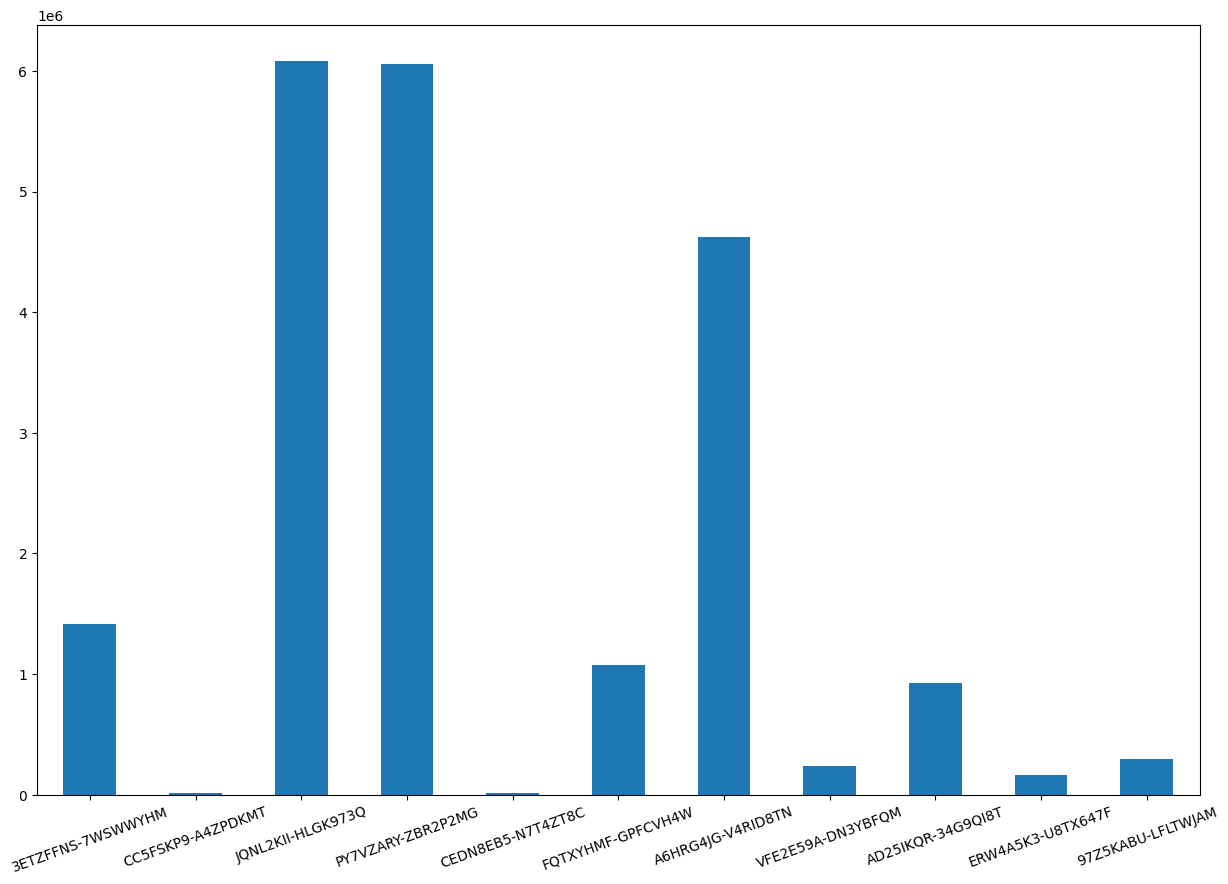

In [39]:
dtm_totals.plot(kind = 'bar', rot=20)

# Antall dokument

<Axes: >

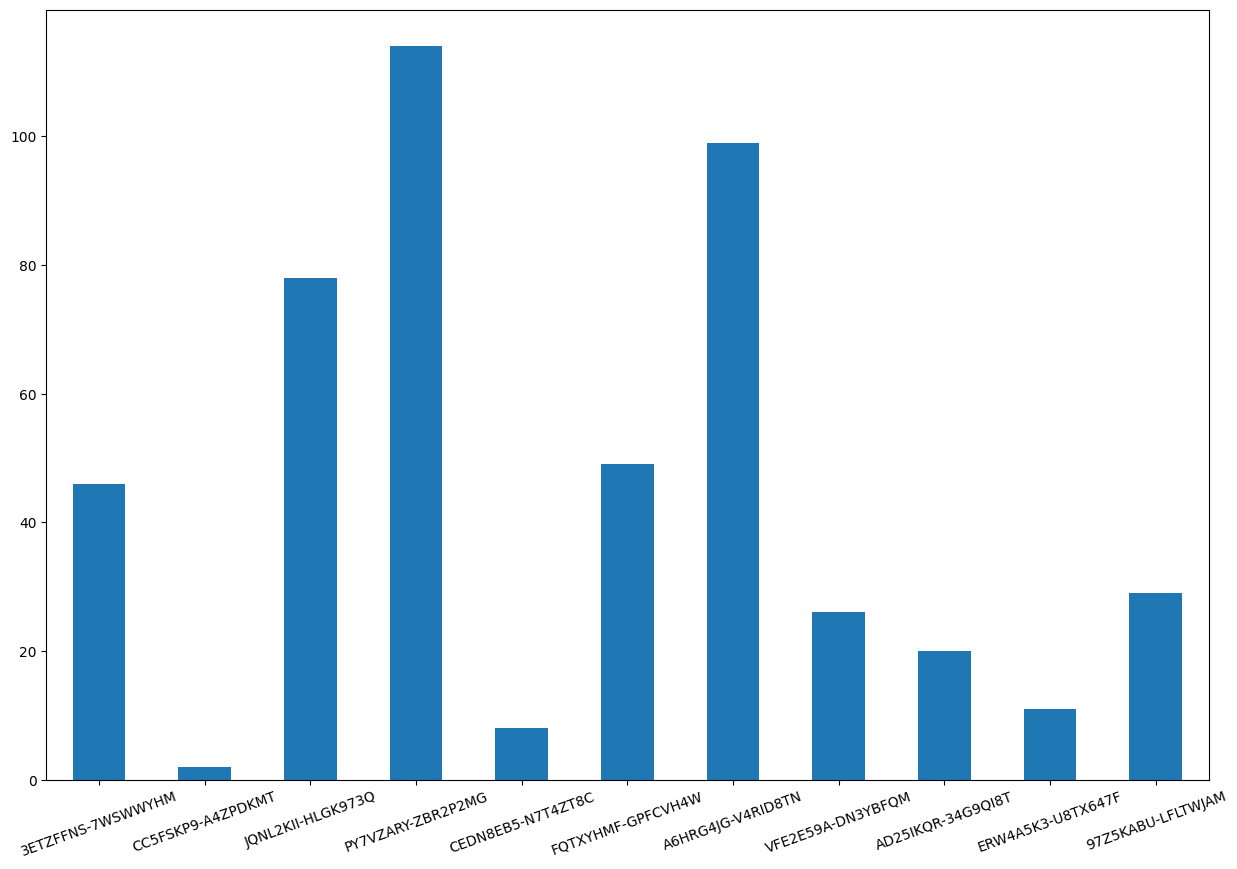

In [40]:
nb.frame(cg).transpose().count().plot(kind='bar', rot = 20)

In [41]:
cg.keys()

dict_keys(['3ETZFFNS-7WSWWYHM', 'CC5FSKP9-A4ZPDKMT', 'JQNL2KII-HLGK973Q', 'PY7VZARY-ZBR2P2MG', 'CEDN8EB5-N7T4ZT8C', 'FQTXYHMF-GPFCVH4W', 'A6HRG4JG-V4RID8TN', 'VFE2E59A-DN3YBFQM', 'AD25IKQR-34G9QI8T', 'ERW4A5K3-U8TX647F', '97Z5KABU-LFLTWJAM'])

In [42]:
# mapping fra forrige
numbering_of_clusters =[x.split() for x in """1 VFE2E59A-TR6PDBUB
2 3N9XWYFJ-ZBR2P2MG
3 JQNL2KII-HLGK973Q
4 V4RID8TN-33CHN65F
5 3ETZFFNS-7WSWWYHM
6 DNXZWQYC-34G9QI8T
7 PY7VZARY-3SN7EBSL
8 HS2MRUCX-V37PB4KM
9 A4ZPDKMT-CC5FSKP9
10 ERW4A5K3-874N6QHD
11 97Z5KABU-LFLTWJAM""".split('\n')]

dict(numbering_of_clusters)

{'1': 'VFE2E59A-TR6PDBUB',
 '2': '3N9XWYFJ-ZBR2P2MG',
 '3': 'JQNL2KII-HLGK973Q',
 '4': 'V4RID8TN-33CHN65F',
 '5': '3ETZFFNS-7WSWWYHM',
 '6': 'DNXZWQYC-34G9QI8T',
 '7': 'PY7VZARY-3SN7EBSL',
 '8': 'HS2MRUCX-V37PB4KM',
 '9': 'A4ZPDKMT-CC5FSKP9',
 '10': 'ERW4A5K3-874N6QHD',
 '11': '97Z5KABU-LFLTWJAM'}

In [43]:
cluster_numbers = dict([(x[1], x[0]) for x in numbering_of_clusters])

In [44]:
numbers = dict([(x[0], list(x[1].split('-'))) for x in numbering_of_clusters])

In [45]:
numbers

{'1': ['VFE2E59A', 'TR6PDBUB'],
 '2': ['3N9XWYFJ', 'ZBR2P2MG'],
 '3': ['JQNL2KII', 'HLGK973Q'],
 '4': ['V4RID8TN', '33CHN65F'],
 '5': ['3ETZFFNS', '7WSWWYHM'],
 '6': ['DNXZWQYC', '34G9QI8T'],
 '7': ['PY7VZARY', '3SN7EBSL'],
 '8': ['HS2MRUCX', 'V37PB4KM'],
 '9': ['A4ZPDKMT', 'CC5FSKP9'],
 '10': ['ERW4A5K3', '874N6QHD'],
 '11': ['97Z5KABU', 'LFLTWJAM']}

In [46]:
cluster_numbers = {x:list(cluster_numbers[x]) for x in cluster_numbers}

In [47]:
for x in cg:
    for y in numbers:
        s = set(cg[x]) & set(numbers[y]) 
        if len(s) >= 1:
            print(x,numbers[y], y, s)

3ETZFFNS-7WSWWYHM ['V4RID8TN', '33CHN65F'] 4 {'33CHN65F'}
3ETZFFNS-7WSWWYHM ['3ETZFFNS', '7WSWWYHM'] 5 {'3ETZFFNS', '7WSWWYHM'}
CC5FSKP9-A4ZPDKMT ['A4ZPDKMT', 'CC5FSKP9'] 9 {'CC5FSKP9', 'A4ZPDKMT'}
JQNL2KII-HLGK973Q ['JQNL2KII', 'HLGK973Q'] 3 {'JQNL2KII', 'HLGK973Q'}
PY7VZARY-ZBR2P2MG ['3N9XWYFJ', 'ZBR2P2MG'] 2 {'ZBR2P2MG'}
PY7VZARY-ZBR2P2MG ['DNXZWQYC', '34G9QI8T'] 6 {'DNXZWQYC'}
PY7VZARY-ZBR2P2MG ['PY7VZARY', '3SN7EBSL'] 7 {'PY7VZARY', '3SN7EBSL'}
PY7VZARY-ZBR2P2MG ['HS2MRUCX', 'V37PB4KM'] 8 {'HS2MRUCX', 'V37PB4KM'}
A6HRG4JG-V4RID8TN ['VFE2E59A', 'TR6PDBUB'] 1 {'TR6PDBUB'}
A6HRG4JG-V4RID8TN ['3N9XWYFJ', 'ZBR2P2MG'] 2 {'3N9XWYFJ'}
A6HRG4JG-V4RID8TN ['V4RID8TN', '33CHN65F'] 4 {'V4RID8TN'}
VFE2E59A-DN3YBFQM ['VFE2E59A', 'TR6PDBUB'] 1 {'VFE2E59A'}
AD25IKQR-34G9QI8T ['DNXZWQYC', '34G9QI8T'] 6 {'34G9QI8T'}
ERW4A5K3-U8TX647F ['ERW4A5K3', '874N6QHD'] 10 {'874N6QHD', 'ERW4A5K3'}
97Z5KABU-LFLTWJAM ['97Z5KABU', 'LFLTWJAM'] 11 {'97Z5KABU', 'LFLTWJAM'}


In [48]:
def check(dictionary, val, default = -1):
    if val in dictionary:
        res = dictionary[val]
    else:
        res = default
    return res
        

In [49]:
list(map(lambda x: check(cluster_numbers,x) , cg.keys()))

[['5'], -1, ['3'], -1, -1, -1, -1, -1, -1, -1, ['1', '1']]

In [50]:
for j,i in enumerate(dtm_totals.index):
    a = i.split('-')
    print(j + 1, i)
    print(ldict[a[0]], ldict[a[1]])
    print()

1 3ETZFFNS-7WSWWYHM
194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil" 336    NOU 2007: 11 Studieforbund - læring for livet

2 CC5FSKP9-A4ZPDKMT
53    NOU 1995: 13 Kostnader ved skolestart for seksåringer: utredning fra et utvalg oppnevnt ved kongelig resolusjon 6. mai 1994 ; avgitt til Finans- og tolldepartementet 7. april 1995 216    St.meld. nr. 21 (1996—97) Finansiering av lærebøker for 2. - 10. klassetrinn og status for tilrettelegging av skolelokaler til seksåringer i forbindelse med Reform 97

3 JQNL2KII-HLGK973Q
203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge 339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning

4 PY7VZARY-ZBR2P2MG
174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen 476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle

5 CEDN8EB5-N7T4ZT8C
487    St.meld. nr. 27 (2004-2005) Om opplæringen innenfor kriminalomsorgen

In [51]:
norden = "norge finland sverige danmark norsk norske finsk finske svensk svenske norden nordisk nordiske".split()
norden += [x.capitalize() for x in norden]

In [52]:
norden

['norge',
 'finland',
 'sverige',
 'danmark',
 'norsk',
 'norske',
 'finsk',
 'finske',
 'svensk',
 'svenske',
 'norden',
 'nordisk',
 'nordiske',
 'Norge',
 'Finland',
 'Sverige',
 'Danmark',
 'Norsk',
 'Norske',
 'Finsk',
 'Finske',
 'Svensk',
 'Svenske',
 'Norden',
 'Nordisk',
 'Nordiske']

In [63]:
dtm.sum(axis = 1).sort_values(ascending = False).head(50)

.            0.469507
og           0.329778
,            0.307347
i            0.306629
0            0.205755
for          0.192471
av           0.190026
til          0.169747
er           0.147687
som          0.143392
at           0.116062
å            0.115841
det          0.114968
en           0.101291
med          0.097546
på           0.090620
har          0.083173
de           0.076307
-            0.069716
om           0.066020
)            0.055013
den          0.053194
(            0.050737
et           0.050173
kan          0.046497
:            0.046302
vil          0.044865
1            0.043600
Det          0.041160
ikke         0.040839
fra          0.038906
2            0.038442
I            0.034574
skal         0.034301
eller        0.030221
ved          0.029290
også         0.028885
3            0.025796
være         0.025138
må           0.022613
dette        0.022145
/            0.020920
andre        0.020643
»            0.020549
seg          0.019800
«         

In [54]:
nb.normalize_corpus_dataframe(dtm)

True

In [55]:
ppt_ord = """Grunnlov
Formål
Normer
Verdier
Rettigheter
Flerkulturell
Mangfold
mangfoldig
Religion
Tospråklige
Skole
Skoleeier
Oppgavefordeling
Undervisning
Ledelse
""".split()
ppt_ord += [x.lower() for x in ppt_ord]
ppt_ord = list(set(ppt_ord))

In [56]:
ppt_ord

['Tospråklige',
 'formål',
 'mangfoldig',
 'skole',
 'flerkulturell',
 'Skoleeier',
 'grunnlov',
 'ledelse',
 'Mangfold',
 'Formål',
 'Religion',
 'skoleeier',
 'oppgavefordeling',
 'Undervisning',
 'undervisning',
 'verdier',
 'Skole',
 'normer',
 'rettigheter',
 'Normer',
 'Flerkulturell',
 'Verdier',
 'Ledelse',
 'tospråklige',
 'mangfold',
 'Oppgavefordeling',
 'Rettigheter',
 'Grunnlov',
 'religion']

In [64]:
(dtm.loc[[x for x in ppt_ord if x in dtm.index]]*100000).fillna(0).style.background_gradient(axis = 1)

,3ETZFFNS-7WSWWYHM,CC5FSKP9-A4ZPDKMT,JQNL2KII-HLGK973Q,PY7VZARY-ZBR2P2MG,CEDN8EB5-N7T4ZT8C,FQTXYHMF-GPFCVH4W,A6HRG4JG-V4RID8TN,VFE2E59A-DN3YBFQM,AD25IKQR-34G9QI8T,ERW4A5K3-U8TX647F,97Z5KABU-LFLTWJAM
Tospråklige,0.000000,0.000000,0.000000,0.346611,0.000000,0.186493,0.238125,0.000000,0.108406,0.000000,0.000000
formål,25.708266,0.000000,20.513512,10.480865,20.262056,11.562580,13.767977,7.473376,32.955430,15.001590,16.369403
mangfoldig,0.282508,0.000000,0.740263,0.990318,0.000000,1.864932,2.229720,2.075938,1.842902,1.200127,0.000000
skole,135.462788,16.842105,21.681483,83.302248,216.128597,18.183090,59.249927,20.759378,72.198409,0.600064,131.637281
flerkulturell,0.070627,0.000000,0.822515,0.445643,0.000000,0.559480,2.879152,1.245563,0.650436,0.000000,0.000000
Skoleeier,0.000000,0.000000,0.016450,0.115537,20.262056,0.093247,1.039093,0.000000,0.000000,0.000000,0.341029
grunnlov,0.706271,0.000000,1.677930,0.231074,0.000000,0.000000,0.216478,0.000000,0.216812,0.000000,0.341029
ledelse,6.215185,0.000000,15.923881,10.678929,0.000000,15.478938,8.009672,12.870814,4.011023,6.000636,2.046175
Mangfold,0.070627,0.000000,0.460608,0.082526,0.000000,1.025713,14.504001,0.000000,0.542030,0.600064,0.341029
Formål,0.565017,0.000000,0.394807,0.264085,0.000000,1.118959,0.757672,0.415188,9.431324,0.000000,0.341029


In [58]:
(dtm.loc[[x for x in "opplæring tilpasset grunnloven grunnlov rettigheter spesialundervisning".split() if x in dtm.index]]*1000000).fillna(0).style.background_gradient(axis = 1)

,3ETZFFNS-7WSWWYHM,CC5FSKP9-A4ZPDKMT,JQNL2KII-HLGK973Q,PY7VZARY-ZBR2P2MG,CEDN8EB5-N7T4ZT8C,FQTXYHMF-GPFCVH4W,A6HRG4JG-V4RID8TN,VFE2E59A-DN3YBFQM,AD25IKQR-34G9QI8T,ERW4A5K3-U8TX647F,97Z5KABU-LFLTWJAM
opplæring,2654.166611,0.000000,314.858560,786.642591,10266.108334,553.884887,1260.332748,817.919495,1020.100644,78.008269,1428.912458
tilpasset,150.435734,1010.526316,99.688761,104.973707,1283.263542,104.436208,241.372555,161.923149,153.936548,54.005725,61.385261
grunnloven,15.537963,0.000000,28.623505,0.990318,67.540186,0.000000,4.762508,0.000000,18.429023,0.000000,0.000000
grunnlov,7.062711,0.000000,16.779296,2.310742,0.000000,0.000000,2.164776,0.000000,2.168120,0.000000,3.410292
rettigheter,280.389607,0.000000,293.637686,61.729821,337.700932,218.197077,314.325515,149.467522,146.348126,18.001908,364.901272
spesialundervisning,470.376520,0.000000,5.099590,18.816042,135.080373,2.797398,153.049683,0.000000,53.118950,0.000000,88.667599


In [66]:
mu.printmd( "## De viktigste ordene i hvert cluster\n\n".format(n = len(cg), d = len(G.nodes())))


for x in cg:
    #mu.printmd(x)
    translate = [labels[z] for z in cg[x][:10]]
    mu.printmd('### Topp rapporter')
    mu.printmd(f"*{', '.join(translate)}*")
    mu.printmd('\n\n')
    rows = ', '.join(
        (
            co.corpus_text(cg[x])['freq']/tot['tot']
        ).sort_values(
            ascending = False
        )[:130].index
    )
    mu.printmd('#### Viktigste ord')
    mu.printmd(rows)



## De viktigste ordene i hvert cluster



### Topp rapporter

*194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil", 336    NOU 2007: 11 Studieforbund - læring for livet, 495    St.meld. nr. 54 (1989-90) Om opplæring av barn, unge og voksne med særskilte behov., 394    St.meld. nr. 23 (1997—98) Om opplæring for barn, unge og vaksne med særskilde behov Den spesialpedagogiske tiltakskjeda og det statlege støttesystemet, 223    St.meld. nr. 35 (1990—91) Tillegg til St.meld. nr. 54 (1989—90) Om opplæring av barn, unge og voksne med særskilte behov, 215    St.meld. nr. 20 (2000-2001) Om korte yrkesrettede utdanninger etter videregående opplæring, 276    St.meld. nr. 12 (2006-2007) Regionale fortrinn – regional framtid, 197    NOU 1997: 16 Tilskuddssystemet for private skoler, 401    St.meld. nr. 61 (1984-85) Om visse sider ved spesialundervisninga og den pedagogisk-psykologiske tenesta, 480    St.meld. nr. 14 (2003-2004) Om opplæringstilbod for hørselshemma*

#### Viktigste ord

Utvalgets, spesialundervisning, oppl, St.meld, NOU, tenesta, lovverket, lovgivning, utvalgets, statlege, arbeids, enkeltvedtak, forvaltningsloven, utdannings-, funksjonshemma, arbeidsmiljøloven, regionene, Utvalget, kompetansesenter, fylkeskommuner, virksomhetene, grunnskole, opplæring, lovgivningen, Vedlegg, Innstilling, regulerer, vidaregåande, arbeidstaker, opplæringen, partementet, forskrifter, voksenopplæring, lov-, særskilte, opplæringa, elevar, lovbestemmelser, fastsetter, sentre, grunnskolen, forskriften, arbeidstakeren, fylkeskommunene, arbeidstakerne, Ot.prp, lovene, regional, mentet, fyl, fortrinn, tilpassa, læremidler, opphevelse, Innst, Lov, oppheves, tilsatte, forskrift, skoleverket, kommunesektoren, skular, fylkeskommunal, meld, fagleg, struktur, sentra, regionalt, likeverdig, hjemmel, forarbeidene, institusjonar, gjennomgåelse, Loven, nale, nr, statstilskudd, vens, Lovens, Departementet, videreføres, fagskole, brukarar, elevens, arbeidsmiljø, virkeområde, Kapittel, inntak, emosjonelle, beid, regionale, læring, inndeling, regioner, lønnsomt, nærmare, barken, kunn, lovs, Bestemmelsen, Gjeldende, stu, oppsigelsen, fastsette, faglege, fastsettes, arbeidsmiljøet, lese-, oppsigelse, vanskar, tilskot, samordning, mandatet, tenester, pkt, Arbeids-, prp, hjemlet, fortrinnsrett, ressursar, fylkeskommunale, Omfanget, somhet, jf., etterutdanning, videreført, lovfestet, virksomhetens, voksnes, bestemmelsen

### Topp rapporter

*53    NOU 1995: 13 Kostnader ved skolestart for seksåringer: utredning fra et utvalg oppnevnt ved kongelig resolusjon 6. mai 1994 ; avgitt til Finans- og tolldepartementet 7. april 1995, 216    St.meld. nr. 21 (1996—97) Finansiering av lærebøker for 2. - 10. klassetrinn og status for tilrettelegging av skolelokaler til seksåringer i forbindelse med Reform 97*

#### Viktigste ord

ant, lærebøker, klassetrinn, skolestart, Reform, tot, meld, tilrettelegging, Finansiering, utdannings-, kommuneøkonomien, lokaler, Innst, utskifting, utløser, innsparing, prp, 0, mill, 1997, 1997., utbygd, midlertidige, klasserom, Kostnader, status, ging, påbegynt, nasjonalbudsjett, 1996, Status, Kommunene, arbei, framdrift, kommunenes, klasser, Kommune, klassene, mid, oppgir, Bakgrunn, mentet, ringene, mune, redegjort, tilpasset, Godkjenning, 1742, partementet, 2022, 1743, 1711, 1420, m.a.o., Asnes, rapportert, spørreundersøkelse, Kommunenes, 1739, Rade, tilpasses, Kirke-, 1665, Utgiftene, presiseres, permanente, Agdenes, 1525, Alesund, byggearbeider, dert, Audnedal, Songdalen, kommunene, Roan, utdypet, overføringene, ordi, gene, Amot, stre, Skjema, nr, Gaular, iverksettes, 97, rap, Solund, hhv., tart, årskull, 532, Modalen, tilpassing, tilpasninger, kro, forutsette, Tustna, Norddal, innhentet, FINANSIERING, forskyvning, akseptable, driftskostnader, 2025, læ, avklart, Hoi, ferdige, Departementets, 1120, 1520, merknad, pkt, sek, Re, spørreskjema, byggestart, Lokaler, 1751, Vanylven, 1725, forutsettes, Bokn, statsbudsjettet, Marnardal, 1755, mht., Gjemnes, Tjeldsund

### Topp rapporter

*203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge, 339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning, 186    St.meld. nr. 27 (2000-2001) Gjør din plikt - Krev din rett Kvalitetsreform av høyere utdanning, 181    St.meld. nr. 42 (1997-98) Kompetansereformen, 481    St.meld. nr. 16 (2001-2002) Kvalitetsreformen Om ny lærerutdanning Mangforldig - Krevende - relevant, 179    St.meld. nr. 36 (1998-99) Om prinsipper for dimensjonering av høgre utdanning, 172    NOU 1997: 25 Ny kompetanse Grunnlaget for en helhetlig etter- og videreutdanningspolitikk, 389    St.meld. nr. 7 (2007-2008) Statusrapport for Kvalitetsreformen  i høgre utdanning, 477    NOU 2003: 25 Ny lov om universiteter og høyskoler, 180    St.meld. nr. 39 (1997-98) Om dimensjonering av ulike studier innenfor høgre utdanning*

#### Viktigste ord

funksjonsevne, samenes, ært, NOU, ogs, institusjonene, St.meld, høyskoler, universitets-, samiske, oppl, Utvalgets, høgskoler, utdannings-, universitetene, universiteter, universell, forskningsråd, Frihet, ørt, utvalgets, meld, forsknings-, ærer, spr, øring, Utvalget, diskriminering, samer, forsk, ått, kompetanseutvikling, samene, Sametinget, misk, tilgjengelighet, funksjonshemma, museene, omr, danning, næ, SND, OECD, mrd., nale, Sosial-, Samisk, Kapittel, vikling, indikatorer, lærerutdanning, etter-, virksomhetene, reindrift, øres, fullmakter, arbeids, Innst, Vedlegg, Forskning, barrierer, forskning, likeverd, BNP, minoriteter, videreutdanning, fyl, samfunns, somhet, partementet, innovasjon, eksternt, tjenesteyting, øer, forskningen, mentet, bedriftenes, ressursbruk, studiekompetanse, utdanningen, vekttall, statlige, arbeidsdeling, samfunns-, ål, konvensjon, institusjonen, utviklingsarbeid, sektoren, mobilitet, virkemidlene, kunn, sam, øp, etnisk, utdanning, Tiltak, evalueringen, Organisering, samisk, fagområder, NSR, virksomhetens, etterutdanning, gjen, nom, ordningene, pst, stu, verdiskaping, sysselsetting, fagfelt, utkastet, Nærings-, Samiske, rammebetingelser, konvensjonen, prioriteringer, utforming, arbeidsstyrken, tilrettelegging, næringene, informasjons-, statlig, gets, høgre, avkastningen, institusjoner, evaluering, beid

### Topp rapporter

*174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen, 476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle, 311    NOU 1988: 28 Med viten og vilje, 227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning, 170    NOU 1991: 4 Veien videre : til studie - og yrkeskompetanse for alle, 225    St.meld. nr. 37 (1990—91) Om organisering og styring i utdanningssektoren, 228    St.meld. nr. 40 (1992—93) ... vi smaa, en Alen lange; Om 6-åringer i skolen - konsekvenser for skoleløpet og retningslinjer for dets innhold, 165    NOU 1986: 23 Livslang læring, 314    NOU 1989: 13 Grenseløs læring mottak av utenlandske studenter, studentutveksling og internasjonalisering, 184    NOU 1993: 24 Lov om universiteter og høgskoler*

#### Viktigste ord

St.meld, høgskoler, NOU, stu, danning, ært, Utvalgets, Lånekassen, verdiskaping, forsk, partementet, lærerutdanning, utdannings-, meld, ogs, Utvalget, Utgifter, gymnaset, studiekompetanse, barnetrygden, oppl, Vedlegg, barnefamilier, universitets-, utdanningen, mentet, utvalgets, universitetene, høyskoler, universiteter, Reform, vekttall, studieretning, førstekonsulent, forsørgere, skoleverket, etterutdanning, SUM, Tilskudd, misk, nale, institusjonene, opplæringen, ørt, Kultur-, høgre, arbeids, ærer, samfunns, Organisering, høgskole, fag-, differensiering, overføringer, studentenes, vikling, gjen, forskningsråd, barnetrygd, næ, kunn, OECD, samiske, grunnskole, utdanning, stipend, Forbruker-, ått, utviklingsarbeid, allmenne, BNP, NTNU, sam, fag, førskolelærere, fagene, læring, sysselsetting, fyl, studietiden, grunnskolen, utgår, Offentlige, ordningene, gym, beid, husholdningene, arbeidsdeling, grunnkurs, administrasjonsdepartementet, voksenopplæring, tilsatte, fakultet, fagområder, underdirektør, fordypning, forsknings-, 1986, kulturarv, sektorer, nom, uni, videreutdanning, eksamener, mobilitet, Idretten, øring, overf, fylkeskommunene, utvalet, elevane, undervisninga, vendig, fagområde, ån, arkiver, yrkesopplæring, pedagogiske, studenter, pro, helsetjeneste, Innst, Departementet, ningene, departementene, Universitetsbiblioteket, ungdomstrinnet, opplæring, hovedfag, allment

### Topp rapporter

*487    St.meld. nr. 27 (2004-2005) Om opplæringen innenfor kriminalomsorgen “Enda en vår”, 284    St.meld. nr. 23 (2003-2004) Om boligpolitikken, 131    St.meld. nr. 27 (1997-98) Om kriminalomsorgen, 118    NOU 1988: 39 Politi og påtalemyndighet:arbeids- og ansvarsfordeling : utredning fra et utvalg oppnevnt ved kongelig resolusjon av 16. januar 1987 : avgitt til Justis- og politidepartementet november 1988, 117    NOU 1981: 35 Politiets rolle i samfunnet:delutredning I, 119    NOU 1991: 29 Lensmannsetatens oppgaver og organisering:utredning fra et utvalg oppnevnt av Justis- og politidepartementet ved brev av 20. juni 1990 : avgitt til [sic] 27. juni 1991, 132    NOU 1987: 27 Politiets rolle og oppgaver i samfunnet: delutredning II, 129    St.meld. nr. 23 (1991-92) Om bekjempelse av kriminalitet*

#### Viktigste ord

innsatte, fengslene, St.meld, opplæringen, Departementets, fengsler, domfelte, opplæring, Aetat, fengslet, visningen, IKT, forekomsten, studiekompetanse, enkeltvedtak, lærernes, mv., oppfølgingen, avbrudd, utdannings-, evalueringen, bibliotekene, etatene, hjemlet, utlendinger, læring, vurderinger, 2003, videreføre, frafall, Opplæring, lese-, 2004, Innst, samfunns-, danning, målgruppen, Modeller, fengsel, rere, skoleverket, kriminaliteten, tilpasset, sorgen, Evaluering, Organisering, omsorgen, etater, nedfelt, mangelfull, utdanning, Justisdepartementet, føring, voksnes, overføringer, høyskole, skoletilbud, Oppfølging, kontinuitet, føringer, murene, samfunnsøkonomisk, Innholdet, minoriteter, telse, videreføres, messig, statsborgerskap, samsvarer, Prinsippet, samordning, Rapporten, innretning, Bakgrunn, instruktører, rehabilitering, fullført, tilbudene, kapitlene, mestring, vektlegges, kriminalitet, Skolene, spesialundervisning, tredel, fremheves, enkeltes, koordinering, motivasjon, beid, yrkesopplæring, prøveprosjekt, lighet, gjennomgås, partementet, ankret, bidragsyter, Andelen, lovgivningen, anstalt, bekjempelse, selvbilde, ...................., Skole-, forpliktelsene, tilbakefall, ressursbruk, likestilt, lov-, verkstedene, rapporterer, instanser, styrking, rammevilkår, motiverende, Fleksibel, fes, universitets-, renovering, grunnskole, skolenes, tilsatte, innvandrere, Ulike, ferier, Aktiviteter, likeverdig, Sandvik, dert, avbryter

### Topp rapporter

*353    NOU 2018: 15 Kvalifisert, forberedt og motivert Et kunnskapsgrunnlag om struktur og innhold i videregående opplæring, 361    NOU 2020: 3 Ny lov om universiteter og høyskoler, 352    NOU 2018: 13 Voksne i grunnskole- og videregående opplæring Finansiering av livsopphold, 391    St.meld. nr. 9 (2016–2017) Fagfolk for fremtiden Fagskoleutdanning, 370    St.meld. nr. 16 (2016–2017) Kultur for kvalitet i høyere utdanning, 384    St.meld. nr. 4 (2018–2019) Langtidsplan for forskning og høyere utdanning 2019 - 2028, 351    NOU 2016: 7 Norge i omstilling - karrierveiledning for individ og samfunn, 369    St.meld. nr. 16 (2015–2016) Fra utenforskap til ny sjanse Samordnet innsats for voksnes læring, 366    St.meld. nr. 14 (2019–2020) Kompetansereformen - Lære hele livet, 374    St.meld. nr. 18 (2014-2015) Konsentrasjon for kvalitet Strukturreform i universitets- og høyskolesektoren*

#### Viktigste ord

OECD, Meld, NOU, utdannings-, finanser, innvandrere, universitets-, NAV, høyskoler, partnerskap, mfl., vendepunkt, J., fag-, BNP, Arbeids-, innvandring, verdiskaping, Fagfolk, digital, Fremtidens, tjenestene, omstilling, nale, veiledere, innovasjon, utdanningen, danning, arbeidsmarkedet, frafall, ordningene, Nasjonalt, services, Education, innvandrerne, produktivitet, Utvalgets, utvalgets, mobilitet, høy-, universiteter, samar-, G., mottakere, yrkes-, IKT, ytelser, 2016, Utvalget, bru-, ressursbruk, sammen-, universitetene, helse-, nettstedet, arbeidsevne, studentenes, kere, anskaffelser, 2015, fagfelt, handlingsrom, digitale, tiårene, Prosent, ningene, kontantstøtte, helhetlig, St.meld, anslås, produktiviteten, https, alderspensjon, arbeids-, samfunns-, levealder, EØS, M., uførepensjon, tjenesteyting, indikatorer, Kapittel, sentre, Economic, andelen, individ, nom, mrd., 2014, helsetjenester, arbeidsmarked, sentralbyrå, Kompetanse, sektoren, finanskrisen, arbeidslivet, arbeidsstyrken, sosialhjelp, oppfølgingen, utdanning, O., ...................., koordinering, anbefalinger, misk, sering, sektor, virksomhetene, Andelen, brukernes, relevans, Canadian, ging, R., kommu-, Working, m.fl, institusjonene, utvik-, sysselsetting, folketrygden, Tilgang, gjennom-, sysselsatte, dagpenger, partementet, arbeidskraften, 2013, kompetanse, P.

### Topp rapporter

*357    NOU 2019: 23 Ny opplæringslov, 340    NOU 2009: 18 Rett til læring, 341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet, 347    NOU 2014: 7 Elevenes læring i fremtidens skole Et kunnskapsgrunnlag, 344    NOU 2012: 1 Til barnas beste Ny lovgivning for barnehagene, 488    St.meld. nr. 30 (2003-2004) Kultur for læring, 349    NOU 2015: 8 Fremtidens skole Fornyelse av fag og kompetanser, 348    NOU 2015: 2 Å høre til Virkemidler for et trygt psykososialt miljø, 368    St.meld. nr. 16 (2006-2007) ... og ingen sto igjen Tidlig innsats for livslang læring, 365    St.meld. nr. 14 (2008-2009) Internasjonalisering av utdanning*

#### Viktigste ord

St.meld, NOU, kommunesektoren, Utvalgets, Sametinget, opplæringen, fyl, nale, mfl., Utvalget, spesialundervisning, funksjonsevne, arbeidsmiljøloven, utvalgets, fylkeskommunene, læremidler, mestring, Arbeids-, sosial-, fylkeskommuner, arbeidstaker, fag-, kompetanseutvikling, handlingsrom, minoriteter, diskriminering, J., enkeltvedtak, frafall, Kapittel, samiske, likestilling, utdannings-, OECD, ressursbruk, innvandrere, arbeidstakerne, barnehagens, læring, virksomhetene, nene, førskolelærere, morsmål, likeverdig, tilsyn, †, tilsynet, evalueringen, språklige, grunnskole, elevenes, inkluderende, trakassering, jf., studiekompetanse, direktivet, regionalt, ungdomstrinnet, opplæring, Meld, tjenestetilbud, læreplanen, indikatorer, virk-, Sosial-, helsetjenester, helhetlig, elevens, tjenestene, mandatet, statlig, arbeidsmarkedet, Andelen, kommunenes, kvin, samordning, fordypning, ging, Politikk, regionale, barrierer, ært, partementet, oppfølgingen, Ot.prp, PPT, Evaluering, ivaretas, regional, helsehjelp, barnehagene, timelønn, Aetat, sosialtjenesten, barnehager, ordningene, sering, tilgjengelighet, grunnskolen, videreføres, valgfrihet, målgruppen, Vedlegg, statlige, høyskoler, Kommunene, Tilsyn, kjønnene, arbeidstakeren, føringer, beid, sektoren, universitets-, 2008, etnisk, arbeidsliv, lov-, arbeidslivet, Innst, mv., Organisering, arbeidstakere, rettssikkerhet, sektorer, vikling, Departementets, arbeidsgiver, lærlinger, mentet, Sundnes

### Topp rapporter

*364    St.meld. nr. 13 (2011–2012) Utdanning for velferd Samspill i praksis, 373    St.meld. nr. 18 (2012–2013) Lange linjer  – kunnskap gir muligheter, 382    St.meld. nr. 30 (2008-2009) Klima for forskning, 332    St.meld. nr. 39 (2006-2007) Frivillighet for alle, 277    St.meld. nr. 15 (2000-2001) Nasjonale minoritetar i Noreg - Om statleg politikk overfor jødar, kvener, rom, romanifolket og skogfinnar, 31    NOU 2009: 08 Kompetanseutvikling i barnevernet Kvalifisering til arbeid i barnevernet gjennom praksisnær og forskningsbasert utdanning, 430    St.meld. nr. 7 (2008-2009) Et nyskapende og bærekraftig Norge, 89    NOU 2005: 3 Fra stykkevis til helt En sammenhengende helsetjeneste, 101    St.meld. nr. 25 (2005-2006) Mestring, muligheter og mening. Framtidas omsorgsutfordringer, 442    NOU 1998: 9 Hvis det haster..... Faglige krav til akuttmedisinsk beredskap*

#### Viktigste ord

samhandling, St.meld, helsetjenesten, tjenestene, funksjonsevne, tjenestetilbud, sosialfag, Utvalgets, Utdanning, Sosial-, helse-, Meld, omsorgsboliger, pleie-, demens, †, NOU, Utvalget, velferd, sosialtjenesten, nale, helsetjenester, fastlege, framtidas, 2050, kullet, Helse-, brukernes, sosial-, individuell, sysselsatt, helsepersonell, utdannings-, tverrfaglig, helsehjelp, helsevern, understøtte, pasientenes, kommunesektoren, levealder, fag-, sykehjemmene, forskningsråd, sammensatte, helsetjeneste, Nasjonalt, yrkes-, framtidens, høyskoler, helhetlig, 2030, somatiske, utvalgets, forebygging, personell, tilgjengelighet, utviklingsarbeid, sektoren, samar-, studiekompetanse, pasientens, universitets-, helsetilstand, årsverk, brukere, 2005, Kull, Arbeids-, kompetansen, Kommunene, 2025, rehabilitering, oppfølgingen, ordningene, ningene, hjelpeapparatet, organisatoriske, SSB, foretak, nene, sykehjem, utdanningen, institusjonene, sentre, kroniske, pasienter, J., tjenester, interkommunalt, Andelen, barnevernet, ging, autorisasjon, universitetene, sykehjemsplasser, avtalene, ressursbruk, innleggelse, arbeidsdeling, treårig, nyutdannede, regionale, mulig-, kvalitativt, legevakt, barrierer, spesialisering, bru-, vel-, pasientene, koordinert, brukerne, enter, rettssikkerhet, opplæringen, Pasienter, stortingsmeldingen, partementet, Kapittel, Økonomiske, universell, Aetat, yrkesgrupper, interkommunale, utfordringene, forsknings-, rammebetingelser, serte, folkehelse, kliniske

### Topp rapporter

*337    NOU 2007: 6 Formål for framtida: formål for barnehagen og opplæringen, 220    St.meld. nr. 29 (1994-95) Om prinsipper og retningslinjer for 10-årig grunnskole - ny læreplan, 177    St.meld. nr. 28 (1998-99) Mot rikare mål Om einskapsskolen, det likeverdige opplæringstilbodet og ein nasjonal strategi for vurdering og kvalitetsutvikling i grunnskolen og den vidaregåande opplæringa, 176    St.meld. nr. 25 (1998-99) Morsmålsopplæring i grunnskolen, 393    St.meld. nr. 14 (1997-98) Om foreldremedverknad i grunnskolen, 171    NOU 1995: 9 Identitet og dialog Kristendomskunnskap, livssynskunnskap og religionsundervisning, 187    St.meld. nr. 32 (2000-2001) Evaluering av faget Kristendomskunnskap med religions- og livssynsorientering, 231    St.meld. nr. 47 (1995-96) Om elevvurdering, skolebasert vurdering og nasjonalt vurderingssystem, 246    St.meld. nr. 23 (1992—93) Om forholdet mellom staten og kommunane, 211    St.meld. nr. 14 (1995–96) Om kristendomskunnskap med religions og livssynsorientering*

#### Viktigste ord

St.meld, opplæringa, trossamfunn, fritak, statlege, Utvalgets, barnehagens, religioner, kir, læreplanen, grunnskolen, minoriteter, kommunane, opplæringen, NOU, livssyn, Evaluering, valgmuligheter, grunnskole, oppl, faget, fellesråd, Innst, kirkelig, meld, ungdomstrinnet, foreldra, Grunnlovens, utdannings-, språklige, BNP, kommunar, Barnehagen, Faget, humanistiske, ressursbruk, ært, Formål, kommunesektoren, kriterium, fagene, innbyggjarar, Utvalget, ogs, fyl, kirkelige, mål-, videreføres, finanser, rettleiing, utvalet, undervisninga, måla, Kirkelig, ressursar, morsmål, Grunnloven, verneverdige, tilskot, nale, morsmålet, barnehagen, innverknad, faglege, Departementet, klassetrinn, vikling, Sejersted, mentet, formålsparagraf, partementet, overordna, tilpassa, livs-, einskilde, utvalgets, kirkes, ærer, etterutdanning, Sandvig, elevenes, endringar, barne, resultata, Regjeringa, òg, Kapittel, intensjonene, inneber, utformes, likeverd, kirkens, likeverdig, religion, misk, elevane, utviklingsarbeid, nom, innafor, danning, kulturarv, oppheves, meldinga, humanistisk, pst, fag-, handlingsrom, oppdragelse, mandatet, læring, levealder, skatteinntekter, leggje, etikk, omtala, læremidler, gjen, evalueringen, lov-, Vedlegg, kirkesamfunn, fagleg, kens, dialog, døpte, kristendommen, vidaregåande, forståing, øse, elevar

### Topp rapporter

*320    St.meld. nr. 24 (1994—95) Nærkringkasting, 321    St.meld. nr. 26 (1991-92) Kringkasting og dagspresse 1990 m.v., 327    St.meld. nr. 42 (1993-94) Kringkasting og dagspresse 1993 m.v., 330    NOU 1992: 14 Mål og midler i pressepolitikken: utredning fra et utvalg oppnevnt ved kongelig resolusjon 15. februar 1991 ; avgitt til Kulturdepartementet 5. mai 1992, 324    St.meld. nr. 32 (1992-93) Media i tida, 312    NOU 1984: 5 Kringkastingsreklame: forslag til finansiering av et utvidet kringkastingstilbud, 137    NOU 1975: 7 Kringkastingslov, 297    NOU 1982: 33 Nærradio, 325    St.meld. nr. 39 (1990-91) Virksomheten i Norsk rikskringkasting m.v., 308    St.meld. nr. 88 (1981-82) Om medieutvikling og nye kringkastingsformer*

#### Viktigste ord

sendetid, meld, frekvens, Vedlegg, konsesjoner, sendingene, kommersielle, dio, dinger, St.meld, rammevilkår, lyttere, Kulturdepartementet, satellitt, kommersiell, kringkasting, reklame, udvikling, konsesjonen, lokal-, konkurser, 1994, bingo, stasjonene, frekvensen, tilladelse, virksomhed, TVN, Konklusjon, tilladt, Nemnda, rammebetingelser, riks, gennem, BI, TVNorge, NFL, levedyktig, kabel, europæiske, omsætning, kon, markedsandel, Kommissionen, 1993, nemndas, udstedt, kommersielt, konsesjon, pro, lytterne, stasjoner, investorer, inneha, Departementets, kende, seere, Kommuner, samsending, tildele, 1992, Media, MMI, Nettverk, egenkapital, partementet, selskab, Gjennomsnittlig, Prosentvis, somhet, slutningen, konkurs, kanal, hovedregel, Ot.prp, senderen, nale, Omfang, tilfældet, eter, Kostnader, mht., eds, begrænset, onene, misk, enerett, erne, vikling, signifikant, TV-, markedsandeler, Lokal-TV, Inn-, udgjorde, sket, Kanal, centrale, lokal, radio-, bransjen, Radioen, aktører, redegjør, nemnda, 1993., variabler, mentet, kanalene, gjen, aktørene, ideelle, Innst, udviklet, seneste, skapene, lytter, Finmark, allmenn, DAB, indtægter, sam, stør, hævder, Lokalradio, lertid, specielt, signalene, speciel, arbejde

### Topp rapporter

*298    NOU 1985: 14 Samisk kultur og utdanning, 232    St.meld. nr. 51 (1988-89) I tillegg til St.meld. nr. 45 for 1987-1988 Om forskning, forsøk og utviklingsarbeid i opplæringa, 151    St.meld. nr. 39 (1983-84) DATATEKNOLOGI I SKOLEN, 185    St.meld. nr. 24 (1993-94) Om informasjonsteknologi i utdanningen : rapport fra handlingsprogrammet 1990-93 og strategi for videre arbeid, 209    St.meld. nr. 14 (1989-90) Informasjonsteknologi i skole og opplæring, 224    St.meld. nr. 37 (1987-88) Om datateknologi i skole og opplæring, 397    St.meld. nr. 45 (1987—88) Om forsking, forsøk og utviklingsarbeid i opplæringa, 201    St.meld. nr. 79 (1983-84) Om det pedagogiske utviklingsarbeidet i skolen og om forsøksvirksomheten i skoleverket skoleårene 1981—82 og 1982-83 (FoU-meldingen), 493    St.meld. nr. 42 (1989—90) Organisering av informasjonsteknologi i skole og opplæring Tillegg til St.meld. nr 14 (1989-90) Informasjonsteknologi i skole og opplæring, 144    NOU 1982: 27 Funksjonsfordeling og administrasjonsordninger*

#### Viktigste ord

samenes, misk, samiske, samene, samer, St.meld, Samisk, programvare, NOU, utviklingsarbeid, samisk, tellingen, Samiske, morsmål, skoleverket, morsmålet, reindrift, språklige, læremidler, opplæringa, etterutdanning, partementet, utdanningen, NSR, etnisk, utarbeiding, IT, meld, databaser, høgskoler, språklig, Nesseby, lærerutdanning, etniske, dialekter, forsking, Utvalgets, utvalgets, grunnskolen, husflid, språk, rådene, egenart, Organisering, mentet, Språket, vikling, fyl, minoritet, kulturell, Innst, kulturarv, livsform, utprøving, grunnskole, skriftspråk, næ, bosettingen, Karasjok, maste, kultur-, irsk, stedsnavn, fagområder, bosetting, språkbruk, lende, folketellingen, bærere, integrering, kultur, Utvalget, språket, Kultur-, utdannings-, grunnsyn, Nasjonalt, målsettinger, Departementet, spesialundervisning, miljøer, pedagogisk, Kautokeino, beidet, opplæring, nale, Rådet, logi, beid, voksenopplæring, gjen, 1985, gets, kulturliv, pro, organer, danning, sam, pedagogiske, minoriteter, videreføring, undervisningsdepartementet, tus, delse, fag-, midlar, vidaregåande, kul, Kirke-, likestilt, hovedtrekk, likestilling, stu, statlege, samfunns, lærebøker, opplæringen, Tana, allmenne, Aarseth, styrking, nom, distribuert, kulturelle, Stortingsmelding, h.h, Same, samordning, særtrekk, likeverd

In [67]:
ldict["3N9XWYFJ"]

'341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet'

1. Lag til sånn at nøklene erstattes med doknavn. Og, at sentralitet er med.
1. Ordne på sentralitet

# Sentralitet


In [68]:
bcentrality = pd.DataFrame(nb.central_betweenness_characters(G, n=1000), columns=['ix', 'bcent']).set_index('ix')
centrality = pd.DataFrame(nb.central_characters(G, n=1000), columns = ['ix', 'cent']).set_index('ix')

In [69]:
df_centrality = pd.concat([bcentrality, centrality], axis = 1)

In [70]:
df_centrality['title'] = df_centrality.index.map(lambda x: ldict[x])

In [71]:
#df_centrality['title'] = df_centr

# Her kan vi se sentralitet

både between og sentralitet

Merk at samisk lærerutdanning kommer høyt ut på betweennes. Stammer fra at det er et linking-dokument (om vi kan kalle noe det)

In [77]:
df_centrality.sort_values(by = 'bcent', ascending = False).head(10).style.background_gradient()

,bcent,cent,title
ix,,,
A6HRG4JG,0.141904,0.149688,357 NOU 2019: 23 Ny opplæringslov
3ETZFFNS,0.084007,0.095634,"194 NOU 1995: 18 Ny lovgivning om opplæring ""... og for øvrig kan man gjøre som man vil"""
FQTXYHMF,0.079648,0.116424,"353 NOU 2018: 15 Kvalifisert, forberedt og motivert Et kunnskapsgrunnlag om struktur og innhold i videregående opplæring"
V4RID8TN,0.077828,0.093555,340 NOU 2009: 18 Rett til læring
JQNL2KII,0.077678,0.095634,203 NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge
GVLDYG9U,0.070974,0.072765,311 NOU 1988: 28 Med viten og vilje
97Z5KABU,0.060951,0.039501,298 NOU 1985: 14 Samisk kultur og utdanning
GPFCVH4W,0.058761,0.068607,361 NOU 2020: 3 Ny lov om universiteter og høyskoler
3SN7EBSL,0.051731,0.072765,227 St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning


In [76]:
df_centrality.sort_values(by = 'cent', ascending = False).head(10).style.background_gradient()

,bcent,cent,title
ix,,,
A6HRG4JG,0.141904,0.149688,357 NOU 2019: 23 Ny opplæringslov
FQTXYHMF,0.079648,0.116424,"353 NOU 2018: 15 Kvalifisert, forberedt og motivert Et kunnskapsgrunnlag om struktur og innhold i videregående opplæring"
3ETZFFNS,0.084007,0.095634,"194 NOU 1995: 18 Ny lovgivning om opplæring ""... og for øvrig kan man gjøre som man vil"""
JQNL2KII,0.077678,0.095634,203 NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge
V4RID8TN,0.077828,0.093555,340 NOU 2009: 18 Rett til læring
3N9XWYFJ,0.036845,0.089397,"341 NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet"
PY7VZARY,0.049684,0.081081,174 NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen
ZBR2P2MG,0.042634,0.079002,476 NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle
GVLDYG9U,0.070974,0.072765,311 NOU 1988: 28 Med viten og vilje


## Klikkstrukturer

In [78]:
cdict = dict(df_centrality['cent'])

In [79]:
cliques = gnl.kcliques(G)
cliques_tree = {x:  
    sorted(list(
        map(
            lambda x: (cdict[x], x, ldict[x]), cliques[x])), reverse = True)
 for x in cliques
}

Det er elleve forskjellige klikk-grupper. Tallet til høyre angir gruppen, og tallet til venstre hvor mange som er relatert til hverandre. Selve klikkstørrelsen blir mindre desto større det tallet er.

In [80]:
max_cliques = sorted(list(cliques_tree.keys()))
groups = {x[1] for x in max_cliques}

In [81]:
max_clique_group = [sorted([x for x in max_cliques if x[1] == y], reverse = True)[0] for y in groups  ]

In [82]:
max_clique_group

[(8, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (5, 8), (5, 9)]

In [83]:
for klikk in max_clique_group:
    d = cliques_tree[klikk]
    print(klikk)
    for x in d:
        print(x)
    print("\n")

(8, 1)
(0.1496881496881497, 'A6HRG4JG', '357    NOU 2019: 23 Ny opplæringslov')
(0.09355509355509356, 'V4RID8TN', '340    NOU 2009: 18 Rett til læring')
(0.0893970893970894, '3N9XWYFJ', '341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet')
(0.060291060291060294, '4VVW4E7R', '368    St.meld. nr. 16 (2006-2007) ... og ingen sto igjen Tidlig innsats for livslang læring')
(0.04781704781704782, 'YGSP98R9', '363    St.meld. nr. 11 (2008-2009) Læreren  Rollen og utdanningen')
(0.04573804573804574, 'M8IEXC3J', '386    St.meld. nr. 44 (2008-2009) Utdanningslinja')
(0.0395010395010395, 'IPC36S5V', '371    St.meld. nr. 18 (2010–2011) Læring og fellesskap Tidlig innsats og gode læringsmiljøer for barn,  unge og voksne med særlige behov')
(0.035343035343035345, 'LBRII9F5', '383    St.meld. nr. 31 (2007-2008) Kvalitet i skolen')
(0.029106029106029108, 'Z4KN26RY', '378    St.meld. nr. 22 (2010 – 2011) Motivasjon – Mestring – Muligheter Ungdomstrinnet')




In [84]:
rows = list()
for klikk in max_clique_group:
    for y in cliques_tree[klikk]:
        rows.append ( (klikk[1],) + y)

In [85]:
df_klikk = pd.DataFrame(rows, columns = "group centrality zid title".split())

In [86]:
df_klikk

,group,centrality,zid,title
0,1,0.149688,A6HRG4JG,357 NOU 2019: 23 Ny opplæringslov
1,1,0.093555,V4RID8TN,340 NOU 2009: 18 Rett til læring
2,1,0.089397,3N9XWYFJ,"341 NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet"
3,1,0.060291,4VVW4E7R,368 St.meld. nr. 16 (2006-2007) ... og ingen sto igjen Tidlig innsats for livslang læring
4,1,0.047817,YGSP98R9,363 St.meld. nr. 11 (2008-2009) Læreren Rollen og utdanningen
5,1,0.045738,M8IEXC3J,386 St.meld. nr. 44 (2008-2009) Utdanningslinja
6,1,0.039501,IPC36S5V,"371 St.meld. nr. 18 (2010–2011) Læring og fellesskap Tidlig innsats og gode læringsmiljøer for barn, unge og voksne med særlige behov"
7,1,0.035343,LBRII9F5,383 St.meld. nr. 31 (2007-2008) Kvalitet i skolen
8,1,0.029106,Z4KN26RY,378 St.meld. nr. 22 (2010 – 2011) Motivasjon – Mestring – Muligheter Ungdomstrinnet
9,2,0.095634,JQNL2KII,203 NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge


In [87]:
df_small = df_klikk[['zid', 'group']]

In [88]:
df_small.head(20)

,zid,group
0,A6HRG4JG,1
1,V4RID8TN,1
2,3N9XWYFJ,1
3,4VVW4E7R,1
4,YGSP98R9,1
5,M8IEXC3J,1
6,IPC36S5V,1
7,LBRII9F5,1
8,Z4KN26RY,1
9,JQNL2KII,2


In [89]:
gnl.show_cliques(G)

(3, 1) QU7MV362, 6BV8YS95, LXMLAZEY, 636EBTU9, NX46SKFP, E5UC3428, AGD66LJC, WR44SNW8, ICGJ5R6J, DVT2R32N, Z52SMZ9I, 93EJ6DH8, DN3YBFQM, 33CHN65F, ASVT2FM6, 9TFDXLXF, 8M42693P, PSKGU9XR, H4FC77LT, G73KS8UQ, 5ARGAXD5, TC9VUUIV, YLP38A4R, HS2MRUCX, EXENA72Y, FQTXYHMF, 6SUNA9ZC, AR2BHG9K, Z4KN26RY, ELI78EZX, AN4VBEKF, 66UW8D43, EJDM67E3, MRQB7B6N, EWUU64GR, UMVINAGY, EFJYEVC6, EBUAS4W8, U2ZWMF5Q, U28W6G7H, MJUHEIIH, Z8I3GF4V, DDERN2U3, LS3DVSRL, EG5CF9XD, 3K2FESNS, EFF5GF65, 7VHGUCIE, HYTH7KQ5, 2CAC6487, GVLDYG9U, JQNL2KII, HA9SMVE4, EJENTABB, NZ9HRJ7K, 37QKRIYC, EM9JCYAZ, F7ZF6LU6, PY7VZARY, 2CGJFSN3, 63SCT62K, YQWKSHX5, IXZCFH88, VFE2E59A, KRL6I8BU, 74K4782Q, NN8RWTJN, 66NTNCWL, YGSP98R9, 6XE6BCA9, HLGK973Q, 2CCB2DFF, 5UEP6FJF, SFKG795G, YGRIWHW4, LJZB6MTP, F9HV5EF8, 7GJ3IZ6V, J7JUTEAB, THS8SVYY, 4I95LEVG, Q473REEE, GPPFNCKA, NTUWGCDT, U68LQ887, NA83BBQ9, 3CP5KRDI, Q7HDXF92, UAW9VMWX, Y4DL944F, IBX4G3RQ, W7IDCXT4, 528XYVYW, RJF67ZIL, 7SQSUAJJ, YQ7GHGC3, WVU5AFQJ, IIM9QZV9, YKFJBKEF, 9AD

In [90]:
for klikk in cliques_tree:
    d = cliques_tree[klikk]
    print(klikk)
    for x in d:
        print(x)
    print("\n")

(3, 1)
(0.1496881496881497, 'A6HRG4JG', '357    NOU 2019: 23 Ny opplæringslov')
(0.11642411642411643, 'FQTXYHMF', '353    NOU 2018: 15 Kvalifisert, forberedt og motivert Et kunnskapsgrunnlag om struktur og innhold i videregående opplæring')
(0.09563409563409564, 'JQNL2KII', '203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge')
(0.09563409563409564, '3ETZFFNS', '194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil"')
(0.09355509355509356, 'V4RID8TN', '340    NOU 2009: 18 Rett til læring')
(0.0893970893970894, '3N9XWYFJ', '341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet')
(0.08108108108108109, 'PY7VZARY', '174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen')
(0.079002079002079, 'ZBR2P2MG', '476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle')
(0.07276507276507277, 'GVLDYG9U', '311    NOU 1988: 28 Med viten 

## dokument

In [91]:
df_centrality[df_centrality.title.str.contains('viten og vilje')]

,bcent,cent,title
ix,,,
GVLDYG9U,0.070974,0.072765,311 NOU 1988: 28 Med viten og vilje


In [92]:
df_centrality[df_centrality.title.str.contains('etnings')][:2]

,bcent,cent,title
ix,,,
DNXZWQYC,0.031865,0.054054,"228 St.meld. nr. 40 (1992—93) ... vi smaa, en Alen lange; Om 6-åringer i skolen - konsekvenser for skoleløpet og retningslinjer for dets innhold"
34G9QI8T,0.014907,0.049896,220 St.meld. nr. 29 (1994-95) Om prinsipper og retningslinjer for 10-årig grunnskole - ny læreplan


In [93]:
df_centrality[df_centrality.title.str.contains('ultur for')]


,bcent,cent,title
ix,,,
7QGFCBNH,0.035826,0.064449,488 St.meld. nr. 30 (2003-2004) Kultur for læring
EXE29BH4,0.009757,0.043659,370 St.meld. nr. 16 (2016–2017) Kultur for kvalitet i høyere utdanning


In [94]:
df_centrality[df_centrality.title.str.contains('første rekke')]


,bcent,cent,title
ix,,,
ZBR2P2MG,0.042634,0.079002,476 NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle


In [95]:
df_centrality[df_centrality.title.str.contains('fornyelse')]


,bcent,cent,title
ix,,,
YQWKSHX5,0.007225,0.033264,381 St.meld. nr. 28 (2015–2016) Fag – Fordypning – Forståelse En fornyelse av Kunnskapsløftet
